### Final Project: INFO6105 Data Science Engineering Methods & Tools
Professor: Dino Konstantopoulos

Group 4: Rasika Koli, Osborne Lopes, Sudarshan Dudhe

##### If you cant make Data Science interesting, you're very boring !

So here we areeeeeeeeeee :- Group 4

__Rasika__ :-  There has been a lot of divorces going on recently, do you know the reason why?:/

__Osborne__ :- Huh Why? Maybe they get bored with age 

__Rasika__ :- No way! I think its because their signs are not compatible . What if we could find out some way to see if zodiac signs influence the divorces?

__Sudarshan__ :- Here we go! Thats a perfect data science plot for our final project 

### 1.0 Do Zodiac Signs have any influence on the divorce date?

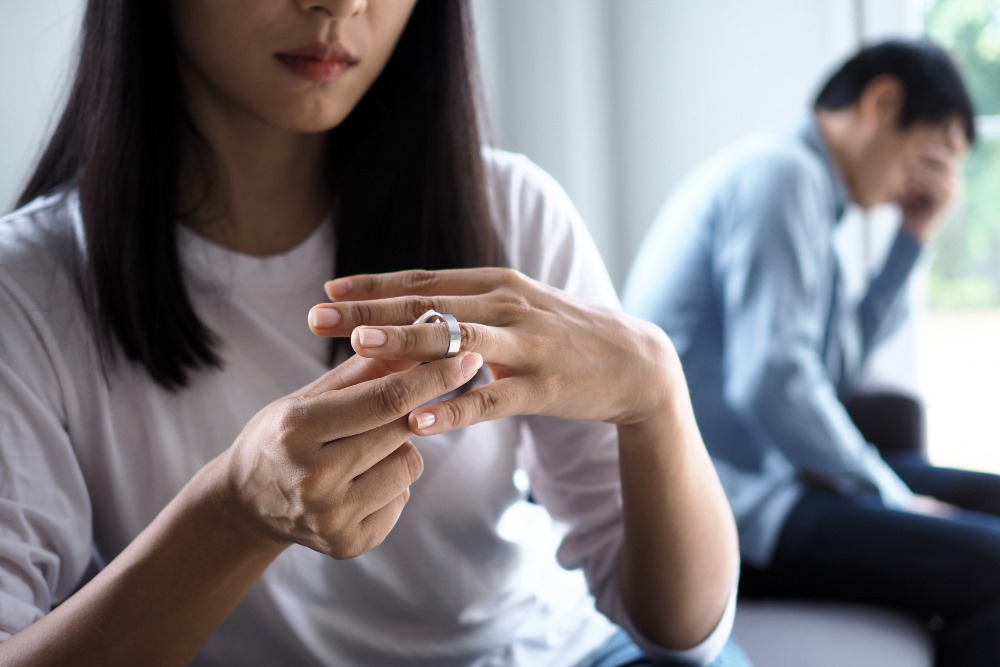

Before we dive into the influence of zodiac signs, lets just know what are the zodiac signs so you all can get a context

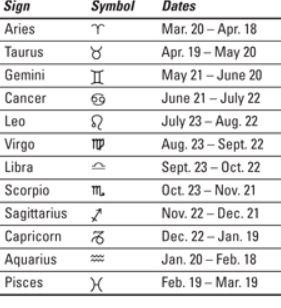

In [177]:
#import modules
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import norm,gamma
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

Aha! So we have taken the data of Mexican government official data for the number of divorces in the city of Xalapa, Mexico
it contains approx. 4,900 divorce records.

Each row represents a record of couple with their divorce date age of each partner and various other factors


__So Lets Look into the data__

In [178]:
#to see the data items
divorce_data = pd.read_csv('data/divorces_2000-2015_translated.csv')

divorce_data
# [['Age_partner_man', 'Age_partner_woman']]
# .keys()


,Divorce_date,Type_of_divorce,Nationality_partner_man,DOB_partner_man,Place_of_birth_partner_man,Birth_municipality_of_partner_man,Birth_federal_partner_man,Birth_country_partner_man,Age_partner_man,Residence_municipality_partner_man,...,Marriage_certificate_municipality,Marriage_certificate_federal,Level_of_education_partner_man,Employment_status_partner_man,Level_of_education_partner_woman,Employment_status_partner_woman,Marriage_duration,Marriage_duration_months,Num_Children,Custody
0,9/6/06,Necesario,MEXICANA,18/12/75,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,30.0,XALAPA,...,XALAPA,VERACRUZ,SECUNDARIA,OBRERO,SECUNDARIA,EMPLEADO,5.0,NaN,1.0,NaN
1,1/2/00,Voluntario,MEXICANA,NaN,NaN,NaN,NaN,NaN,47.0,NaN,...,XALAPA,VERACRUZ,PREPARATORIA,ESTABLECIMIENTO,PREPARATORIA,EMPLEADO,NaN,NaN,NaN,NaN
2,1/2/05,Necesario,MEXICANA,22/2/55,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,49.0,NaN,...,XALAPA,VERACRUZ,PREPARATORIA,OBRERO,NaN,TRABAJADOR POR CUENTA PROPIA EN VIA PUBLICA,NaN,NaN,NaN,NaN
3,1/2/06,Necesario,MEXICANA,20/1/64,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,42.0,XALAPA,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PREPARATORIA,EMPLEADO,18.0,NaN,2.0,MADRE
4,1/2/06,Necesario,MEXICANA,30/10/75,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,30.0,COATEPEC,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PREPARATORIA,NO TRABAJA,7.0,NaN,2.0,MADRE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4918,31/10/12,Voluntario,MEXICANA,29/10/77,MORELIA,MORELIA,MICHOACAN,MEXICO,35.0,MORELIA,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PROFESIONAL,EMPLEADO,3.0,11.0,NaN,NaN
4919,31/10/13,Voluntario,MEXICANA,10/11/82,VERACRUZ,VERACRUZ,VERACRUZ,MEXICO,30.0,XALAPA,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PROFESIONAL,EMPLEADO,1.0,NaN,NaN,NaN
4920,31/10/13,Voluntario,MEXICANA,28/10/54,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,59.0,EMILIANO ZAPATA,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PROFESIONAL,EMPLEADO,35.0,NaN,2.0,NaN
4921,31/12/12,Voluntario,MEXICANA,7/2/58,TLAPACOYAN,TLAPACOYAN,VERACRUZ,MEXICO,54.0,XALAPA,...,TLAPACOYAN,VERACRUZ,PREPARATORIA,NaN,PRIMARIA,NO TRABAJA,33.0,NaN,2.0,NaN


So as we can see there are lot of features in this data set. Some important for us are like Divorce_date,DOB_partner_man, Type_of_divorce, Age_partner_man,Marriage_duration,Marriage_duration_months,Num_Children,etc 

In [179]:
divorce_data.columns

Index(['Divorce_date', 'Type_of_divorce', 'Nationality_partner_man',
       'DOB_partner_man', 'Place_of_birth_partner_man',
       'Birth_municipality_of_partner_man', 'Birth_federal_partner_man',
       'Birth_country_partner_man', 'Age_partner_man',
       'Residence_municipality_partner_man', 'Residence_federal_partner_man',
       'Residence_country_partner_man', 'Monthly_income_partner_man_peso',
       'Occupation_partner_man', 'Place_of_residence_partner_man',
       'Nationality_partner_woman', 'DOB_partner_woman',
       'DOB_registration_date_partner_woman', 'Place_of_birth_partner_woman',
       'Birth_municipality_of_partner_woman', 'Birth_federal_partner_woman',
       'Birth_country_partner_woman', 'Age_partner_woman',
       'Place_of_residence_partner_woman',
       'Residence_municipality_partner_woman',
       'Residence_federal_partner_woman', 'Residence_country_partner_woman',
       'Occupation_partner_woman', 'Monthly_income_partner_woman_peso',
       'Date_of_m

### 1.1 Exploratory Data Analysis

We see that there are many features for both divorced partners (males and females) and that is good. While some features like divorce, marriage date, monthly income, residence, profession - might potentially be useful, but for the first instance of this project we want to focus on the zodiac signs and for that, we would only need the birth dates which are:

'DOB_partner_man' 'DOB_partner_woman' Age_partner_man','Age_partner_woman','Divorce_date','Date_of_marriage'



For now, we are trying to analyse only on the basis of zodiac signs so we would require DOB's and age of both partners , Divorce date and Date of Marriage

In [180]:
#dropping all coloumns except partners' birth dates
divorce_data.drop(divorce_data.columns.difference(['DOB_partner_man','DOB_partner_woman','Age_partner_man','Age_partner_woman','Divorce_date','Date_of_marriage']), axis=1, inplace=True)



We want to check the top few values in our data 

In [181]:
divorce_data.head()

,Divorce_date,DOB_partner_man,Age_partner_man,DOB_partner_woman,Age_partner_woman,Date_of_marriage
0,9/6/06,18/12/75,30.0,8/1/83,22.0,26/6/00
1,1/2/00,NaN,47.0,NaN,41.0,17/2/77
2,1/2/05,22/2/55,49.0,21/3/47,57.0,18/12/75
3,1/2/06,20/1/64,42.0,NaN,NaN,3/12/87
4,1/2/06,30/10/75,30.0,13/10/78,27.0,14/11/98


### Data Cleaning :

We check the null values

<Axes: >

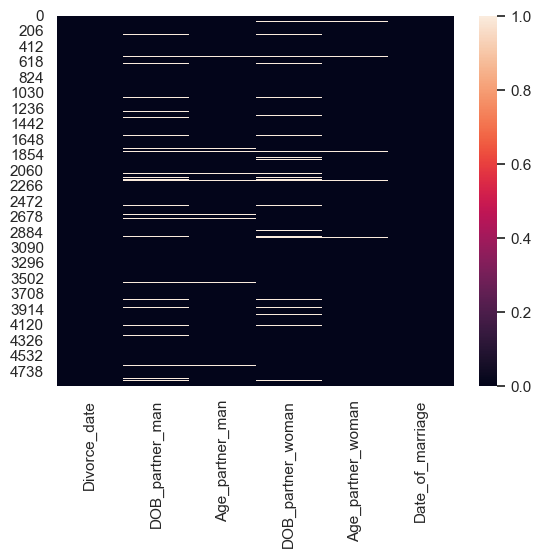

In [182]:
sns.heatmap(divorce_data.isnull())

In [183]:
divorce_data['DOB_partner_man'].isnull().sum()
divorce_data.isnull().sum()

Divorce_date           0
DOB_partner_man      381
Age_partner_man      107
DOB_partner_woman    452
Age_partner_woman    151
Date_of_marriage       0
dtype: int64

In [184]:

divorce_data.dropna(subset=['DOB_partner_man'], inplace=True)


In [185]:
divorce_data['DOB_partner_man'].isnull().sum()

0

In [186]:
divorce_data['DOB_partner_woman'].isnull().sum()

168

In [187]:

divorce_data.dropna(subset=['DOB_partner_woman'], inplace=True)



In [188]:
divorce_data['DOB_partner_woman'].isnull().sum()

0

Checking Null values :)

<Axes: >

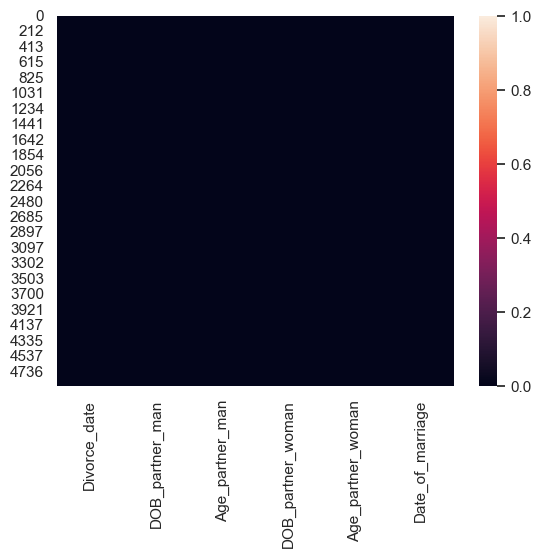

In [189]:
sns.heatmap(divorce_data.isnull())

__Hooray! No Null Values now__ 

It is a divorce dataset, so wouldn't it be weird to predict compatibility on the basis of it. But thats what we have right now, so lets figure out what we could do

Now what we are doing next is removing a compatibility rating on the basis of marriage lasted.

The life expectancy in Mexico is 75 . 
And we get the marriage duration by divorce date - marriage date
So what we do is if the man has married at a specific age and gets divorced we divide the (marriage duration)/(75 - marriage date)

Then we normalise it on a scale from 0 to 1

In [190]:
# divorce_data['Divorce_date']
divorce_data['Divorce_year'] = divorce_data['Divorce_date'].str.split('/').str[2]
divorce_data['marriage_year'] = divorce_data['Date_of_marriage'].str.split('/').str[2]
divorce_data[['Divorce_date','Divorce_year','marriage_year']]
# divorce_data['marriage_year'].min()
# .date()

def transform_year(year):
    year = int(year)  # Convert year to integer for numerical comparison

    if 0 <= year <= 15:
        return 2000 + year
    elif 16 <= year <= 99:
        return 1900 + year
    else:
        return year  # No transformation needed for other cases
    
divorce_data['marriage_year'] = divorce_data['marriage_year'].apply(transform_year)
divorce_data['Divorce_year'] = divorce_data['Divorce_year'].apply(transform_year)

divorce_data['Marriage_duration_years'] = divorce_data['Divorce_year'] - divorce_data['marriage_year']

divorce_data['Expected_marriage_duration_according_to_woman'], divorce_data['Expected_marriage_duration_according_to_man'] = 75-(divorce_data['Age_partner_woman'] - divorce_data['Marriage_duration_years']),75-(divorce_data['Age_partner_man'] - divorce_data['Marriage_duration_years'])
divorce_data['Expected_marriage_duration_average'] = ((divorce_data['Expected_marriage_duration_according_to_woman'] + divorce_data['Expected_marriage_duration_according_to_man'])/2)
divorce_data['Marriage_lasted_rating'] = ( divorce_data['Marriage_duration_years']/divorce_data['Expected_marriage_duration_average'] )/100

# Find the maximum value in the column
max_value = divorce_data['Marriage_lasted_rating'].max()

# Normalize the column

divorce_data['Normalized_Marriage_lasted_rating'] = divorce_data['Marriage_lasted_rating'] / max_value
divorce_data['Normalized_Marriage_lasted_rating'].max()
divorce_data

,Divorce_date,DOB_partner_man,Age_partner_man,DOB_partner_woman,Age_partner_woman,Date_of_marriage,Divorce_year,marriage_year,Marriage_duration_years,Expected_marriage_duration_according_to_woman,Expected_marriage_duration_according_to_man,Expected_marriage_duration_average,Marriage_lasted_rating,Normalized_Marriage_lasted_rating
0,9/6/06,18/12/75,30.0,8/1/83,22.0,26/6/00,2006,2000,6,59.0,51.0,55.0,0.001091,0.096846
2,1/2/05,22/2/55,49.0,21/3/47,57.0,18/12/75,2005,1975,30,48.0,56.0,52.0,0.005769,0.512166
4,1/2/06,30/10/75,30.0,13/10/78,27.0,14/11/98,2006,1998,8,56.0,53.0,54.5,0.001468,0.130313
5,1/2/06,28/3/73,32.0,14/6/76,29.0,20/1/95,2006,1995,11,57.0,54.0,55.5,0.001982,0.175951
6,1/2/07,13/12/70,36.0,4/11/71,35.0,16/8/91,2007,1991,16,56.0,55.0,55.5,0.002883,0.255929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4918,31/10/12,29/10/77,35.0,12/1/78,34.0,25/10/08,2012,2008,4,45.0,44.0,44.5,0.000899,0.079798
4919,31/10/13,10/11/82,30.0,9/2/81,32.0,26/5/12,2013,2012,1,44.0,46.0,45.0,0.000222,0.019728
4920,31/10/13,28/10/54,59.0,17/2/57,56.0,2/6/78,2013,1978,35,54.0,51.0,52.5,0.006667,0.591837
4921,31/12/12,7/2/58,54.0,27/1/64,48.0,5/11/79,2012,1979,33,60.0,54.0,57.0,0.005789,0.513963


For now we only want to analyse on the basis of zodiac signs so we only need the partner's birthdates with their rating

In [191]:
#dropping all coloumns except partners' birth dates
divorce_data.drop(divorce_data.columns.difference(['DOB_partner_man','DOB_partner_woman','Normalized_Marriage_lasted_rating']), axis=1, inplace=True)
divorce_data.head()


,DOB_partner_man,DOB_partner_woman,Normalized_Marriage_lasted_rating
0,18/12/75,8/1/83,0.096846
2,22/2/55,21/3/47,0.512166
4,30/10/75,13/10/78,0.130313
5,28/3/73,14/6/76,0.175951
6,13/12/70,4/11/71,0.255929


In [192]:
#cheking data types 
divorce_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4374 entries, 0 to 4922
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   DOB_partner_man                    4374 non-null   object 
 1   DOB_partner_woman                  4374 non-null   object 
 2   Normalized_Marriage_lasted_rating  4373 non-null   float64
dtypes: float64(1), object(2)
memory usage: 136.7+ KB


Now lets get the zodiac signs for every couple .......

For Zodiac signs we need the date and month of each partner

First we split the date of both the partners to find the zodiac signs

In [193]:
#set the right format for DOB columns 
divorce_data[['DOB_partner_man', 'DOB_partner_woman']] = divorce_data[['DOB_partner_man', 'DOB_partner_woman']].apply(pd.to_datetime)

#getting the day and month separately for both partners
divorce_data['day_partner_1'], divorce_data['month_partner_1'] = divorce_data['DOB_partner_man'].apply(lambda x: x.day), divorce_data['DOB_partner_man'].apply(lambda x: x.month)
divorce_data['day_partner_2'], divorce_data['month_partner_2'] = divorce_data['DOB_partner_woman'].apply(lambda x: x.day), divorce_data['DOB_partner_woman'].apply(lambda x: x.month)

#get rid of the DOB col as we don't need years
divorce_data = divorce_data.drop(['DOB_partner_man', 'DOB_partner_woman'], axis=1)

divorce_data.head(10)

/var/folders/jm/3w1dz5w55nj8bqyr7t76_qr00000gn/T/ipykernel_21625/290254639.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  divorce_data[['DOB_partner_man', 'DOB_partner_woman']] = divorce_data[['DOB_partner_man', 'DOB_partner_woman']].apply(pd.to_datetime)
/var/folders/jm/3w1dz5w55nj8bqyr7t76_qr00000gn/T/ipykernel_21625/290254639.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  divorce_data[['DOB_partner_man', 'DOB_partner_woman']] = divorce_data[['DOB_partner_man', 'DOB_partner_woman']].apply(pd.to_datetime)


,Normalized_Marriage_lasted_rating,day_partner_1,month_partner_1,day_partner_2,month_partner_2
0,0.096846,18,12,1,8
2,0.512166,22,2,21,3
4,0.130313,30,10,13,10
5,0.175951,28,3,14,6
6,0.255929,13,12,11,4
7,0.137904,17,2,27,8
8,0.037379,12,2,1,3
9,0.120666,17,11,13,3
10,0.214622,6,4,16,2
11,0.088776,13,11,13,5


No we write a functio to get the zodiacs for each partner

In [194]:
# function for the zodiac sign determination

def zodiac_sign(day, month): 
    
    if month == 12: 
        return 'Sagittarius' if (day < 22) else 'Capricorn'

    elif month == 1: 
        return 'Capricorn' if (day < 20) else 'Aquarius'

    elif month == 2: 
        return 'Aquarius' if (day < 19) else 'Pisces'

    elif month == 3: 
        return 'Pisces' if (day < 21) else 'Aries'

    elif month == 4: 
        return 'Aries' if (day < 20) else 'Taurus'

    elif month == 5: 
        return 'Taurus' if (day < 21) else 'Gemini'

    elif month == 6: 
        return 'Gemini' if (day < 21) else 'Cancer'

    elif month == 7: 
        return 'Cancer' if (day < 23) else 'Leo'

    elif month == 8: 
        return 'Leo' if (day < 23) else 'Virgo'

    elif month == 9: 
        return 'Virgo' if (day < 23) else 'Libra'

    elif month == 10: 
        return 'Libra' if (day < 23) else 'Scorpio'

    elif month == 11: 
        return 'Scorpio' if (day < 22) else 'Sagittarius'

In [195]:
#creating additional cols for zodiac signs for both partners

divorce_data['Zod_sign_partner_1'] = divorce_data.apply(lambda x: zodiac_sign(x['day_partner_1'], x['month_partner_1']), axis=1)
divorce_data['Zod_sign_partner_2'] = divorce_data.apply(lambda x: zodiac_sign(x['day_partner_2'], x['month_partner_2']), axis=1)

In [196]:
#checking our zodiac signs do make sense
divorce_data.head(10)

,Normalized_Marriage_lasted_rating,day_partner_1,month_partner_1,day_partner_2,month_partner_2,Zod_sign_partner_1,Zod_sign_partner_2
0,0.096846,18,12,1,8,Sagittarius,Leo
2,0.512166,22,2,21,3,Pisces,Aries
4,0.130313,30,10,13,10,Scorpio,Libra
5,0.175951,28,3,14,6,Aries,Gemini
6,0.255929,13,12,11,4,Sagittarius,Aries
7,0.137904,17,2,27,8,Aquarius,Virgo
8,0.037379,12,2,1,3,Aquarius,Pisces
9,0.120666,17,11,13,3,Scorpio,Pisces
10,0.214622,6,4,16,2,Aries,Aquarius
11,0.088776,13,11,13,5,Scorpio,Taurus


Now that we have zodiac signs for each couple, how about we group them with zodiac_combinations because a divorce is coz of 2 different people and not one

In [197]:
divorce_data['Zodiac_combinations'] = divorce_data['Zod_sign_partner_1'] + divorce_data['Zod_sign_partner_2']

In [198]:
divorce_data.head()

,Normalized_Marriage_lasted_rating,day_partner_1,month_partner_1,day_partner_2,month_partner_2,Zod_sign_partner_1,Zod_sign_partner_2,Zodiac_combinations
0,0.096846,18,12,1,8,Sagittarius,Leo,SagittariusLeo
2,0.512166,22,2,21,3,Pisces,Aries,PiscesAries
4,0.130313,30,10,13,10,Scorpio,Libra,ScorpioLibra
5,0.175951,28,3,14,6,Aries,Gemini,AriesGemini
6,0.255929,13,12,11,4,Sagittarius,Aries,SagittariusAries


Lets plot to see how many zodiac signs and combinations do we have across our data

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143]),
 [Text(0, 0, 'SagittariusLeo'),
  Text(1, 0, 'PiscesAries'),
  Text(2, 0, 'ScorpioLibra'),
  Text(3, 0, 'AriesGemini'),
  Text(4, 0, 'SagittariusAries'),
  Text(5, 0, 'AquariusVirgo'

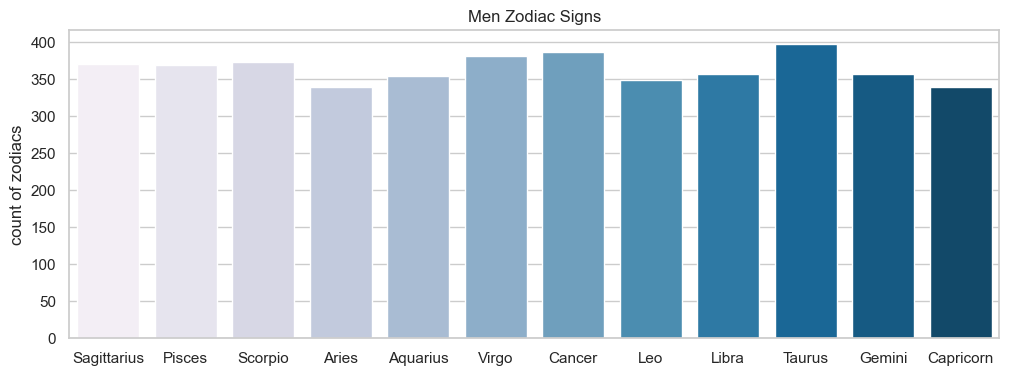

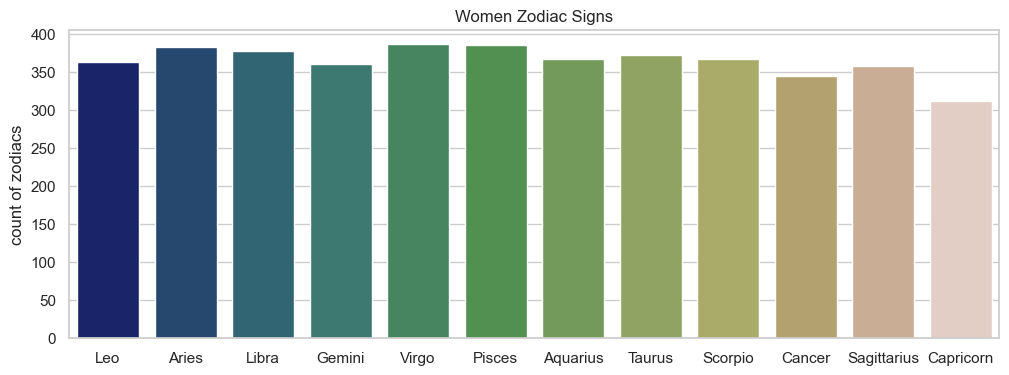

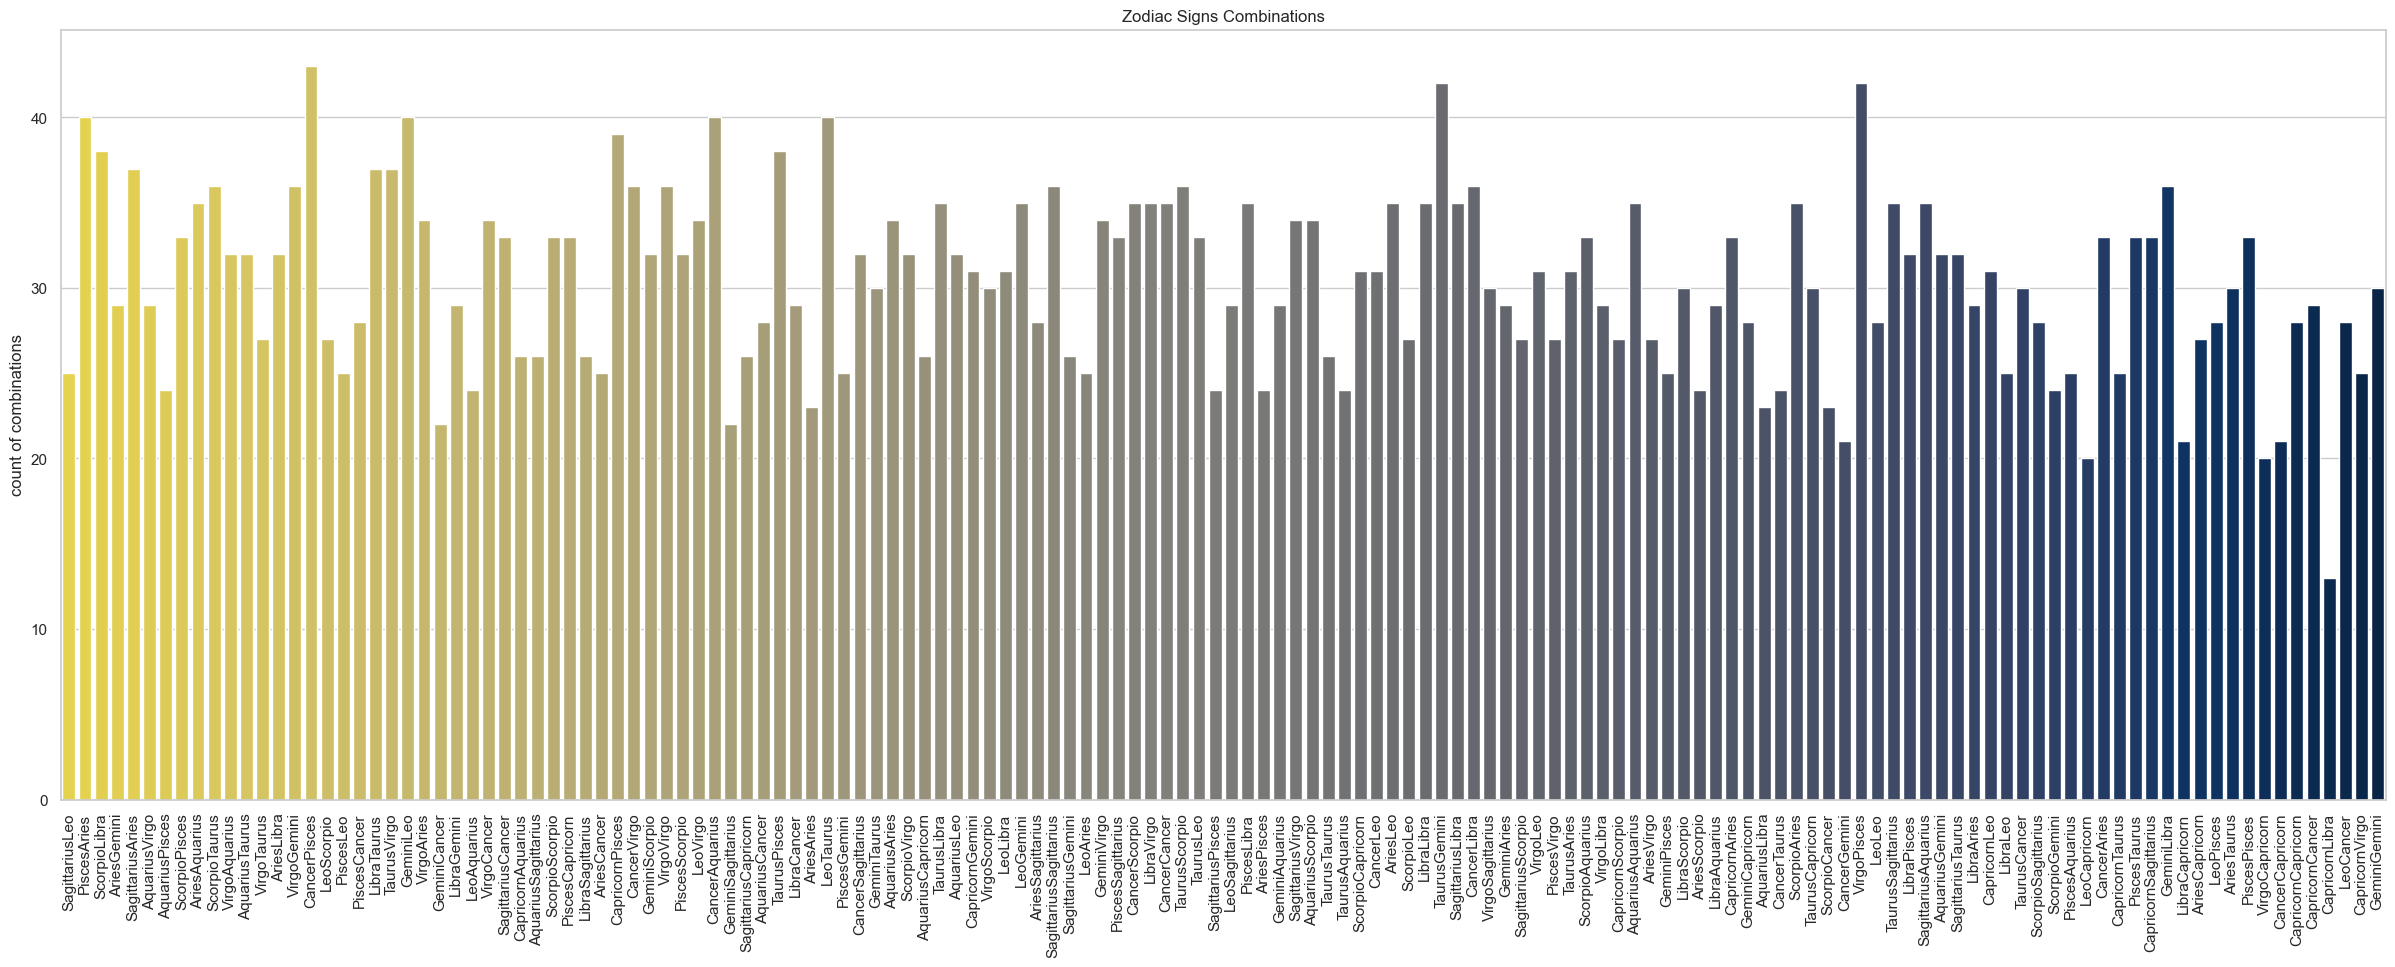

In [199]:
#plotting a chart for a number of men zodiac signs across the data
plt.figure(figsize=(12,4))
plot = sns.countplot(x="Zod_sign_partner_1", data=divorce_data, palette="PuBu").set_title('Men Zodiac Signs')
plt.xlabel("")
plt.ylabel("count of zodiacs")

#making a one for women 
plt.figure(figsize=(12,4))
plot = sns.countplot(x="Zod_sign_partner_2", data=divorce_data, palette="gist_earth").set_title('Women Zodiac Signs')
plt.xlabel("")
plt.ylabel("count of zodiacs")

#making one more for the couples combinations

#plotting a chart for combinations
plt.figure(figsize=(30,10))
plot = sns.countplot(x="Zodiac_combinations", data=divorce_data,palette="cividis_r").set_title('Zodiac Signs Combinations')
plt.xlabel("")
plt.ylabel("count of combinations")
plt.xticks(rotation=90)

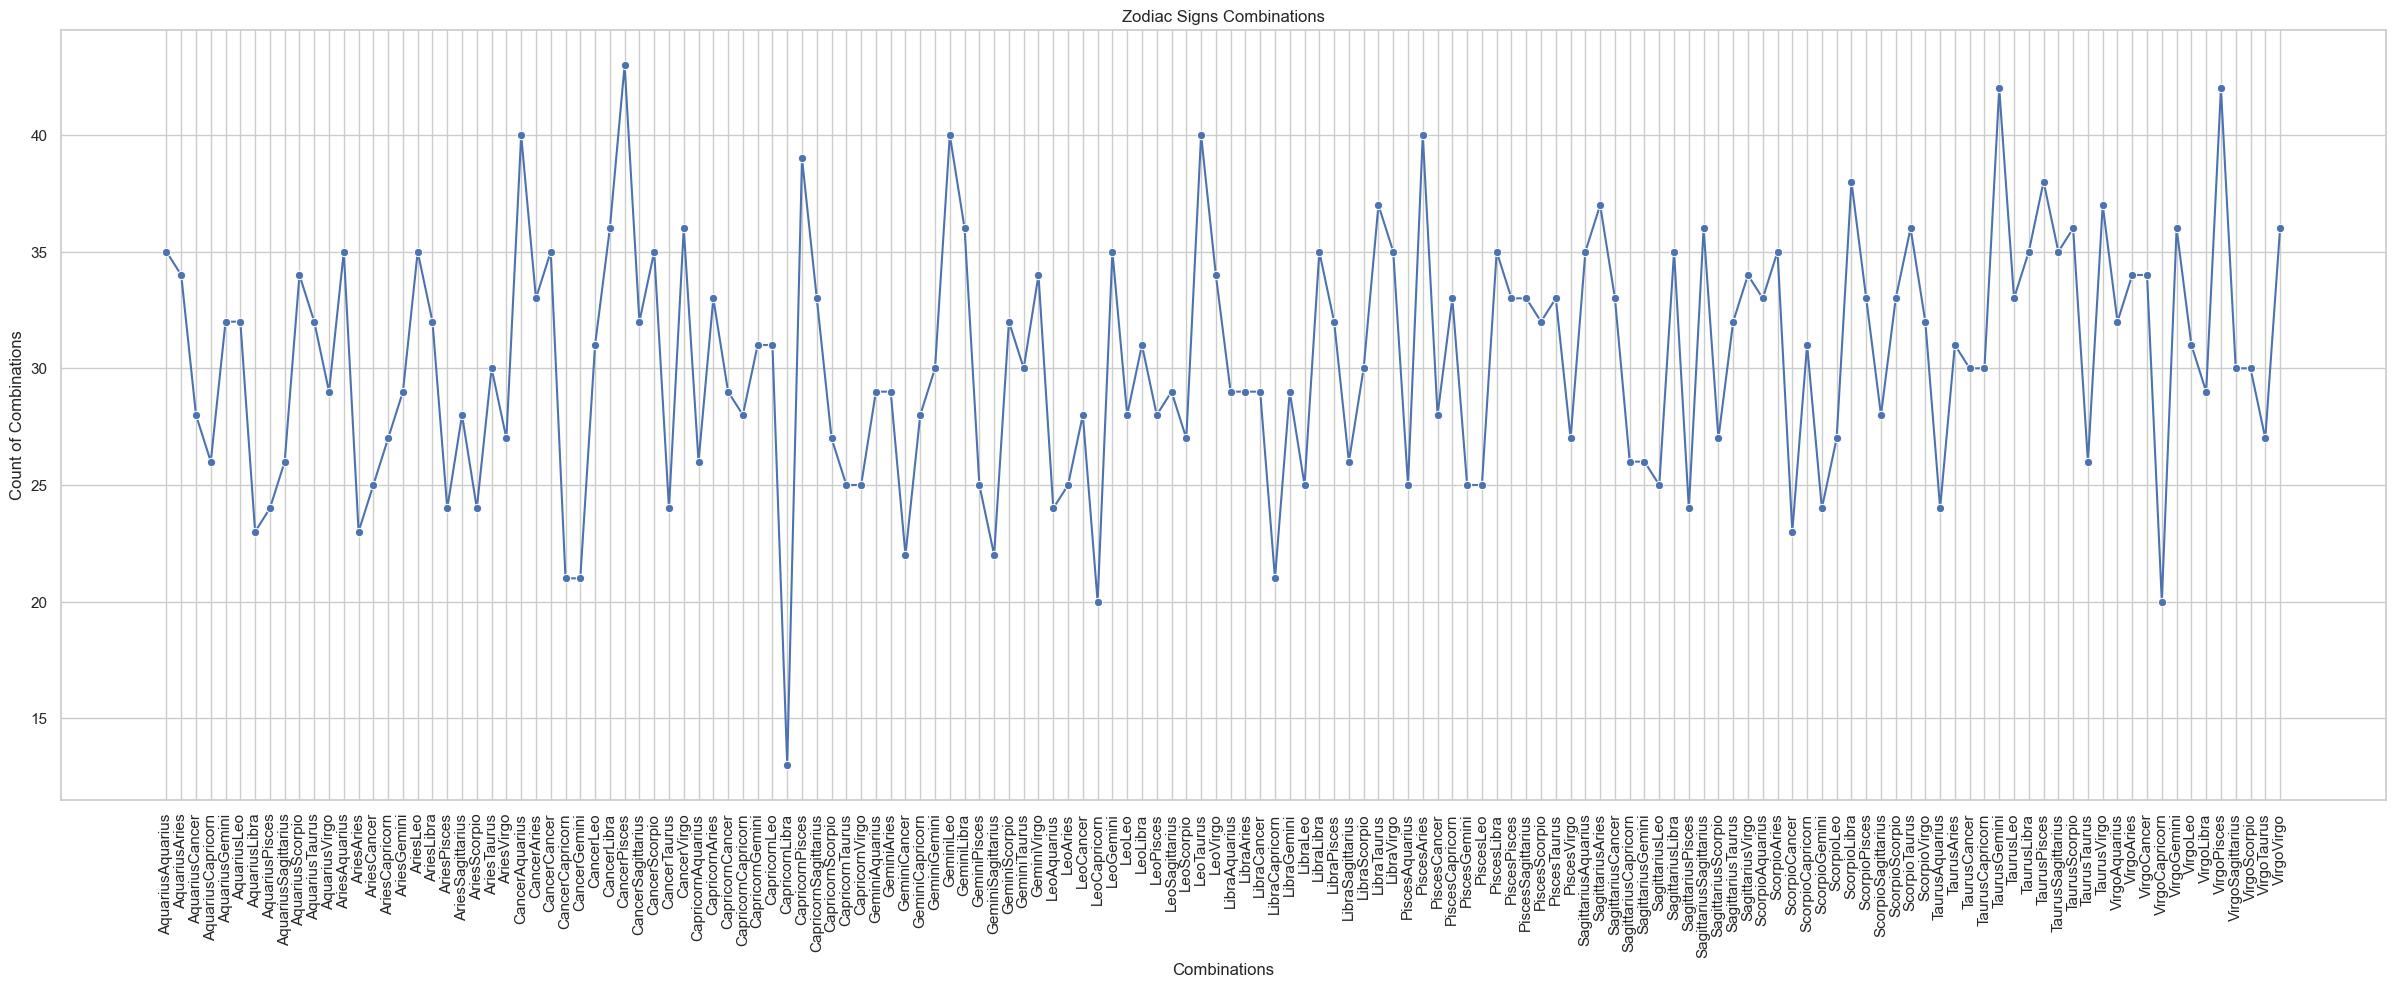

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'divorce_data' with a column 'Couples'

# Plotting a line chart for combinations
plt.figure(figsize=(30,10))
plot = sns.lineplot(x="Zodiac_combinations", y="count", data=divorce_data.groupby("Zodiac_combinations").size().reset_index(name="count"), marker="o", color="b")
plt.title('Zodiac Signs Combinations')
plt.xlabel("Combinations")
plt.ylabel("Count of Combinations")
plt.xticks(rotation=90)
plt.show()


Lets look into the data  more ...

In [201]:
 divorce_data.groupby("Zodiac_combinations").Normalized_Marriage_lasted_rating.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
Zodiac_combinations,,,,,
AquariusAquarius,35,0.263927,0.275915,0.186192,0.703504
AquariusAries,34,0.158640,0.192815,0.133003,0.574430
AquariusCancer,28,0.131750,0.216783,0.177142,0.688010
AquariusCapricorn,26,0.202374,0.260231,0.196059,0.648744
AquariusGemini,32,0.186836,0.232104,0.172019,0.669710
...,...,...,...,...,...
VirgoPisces,42,0.152980,0.191591,0.155553,0.768778
VirgoSagittarius,30,0.179497,0.228506,0.153625,0.618436
VirgoScorpio,30,0.163898,0.222780,0.151498,0.544959


Lets get the top 10 zodiac combination couple divorces. __Just a Hint:__ You will get to know whom you shouldn't marry if you're the respective other

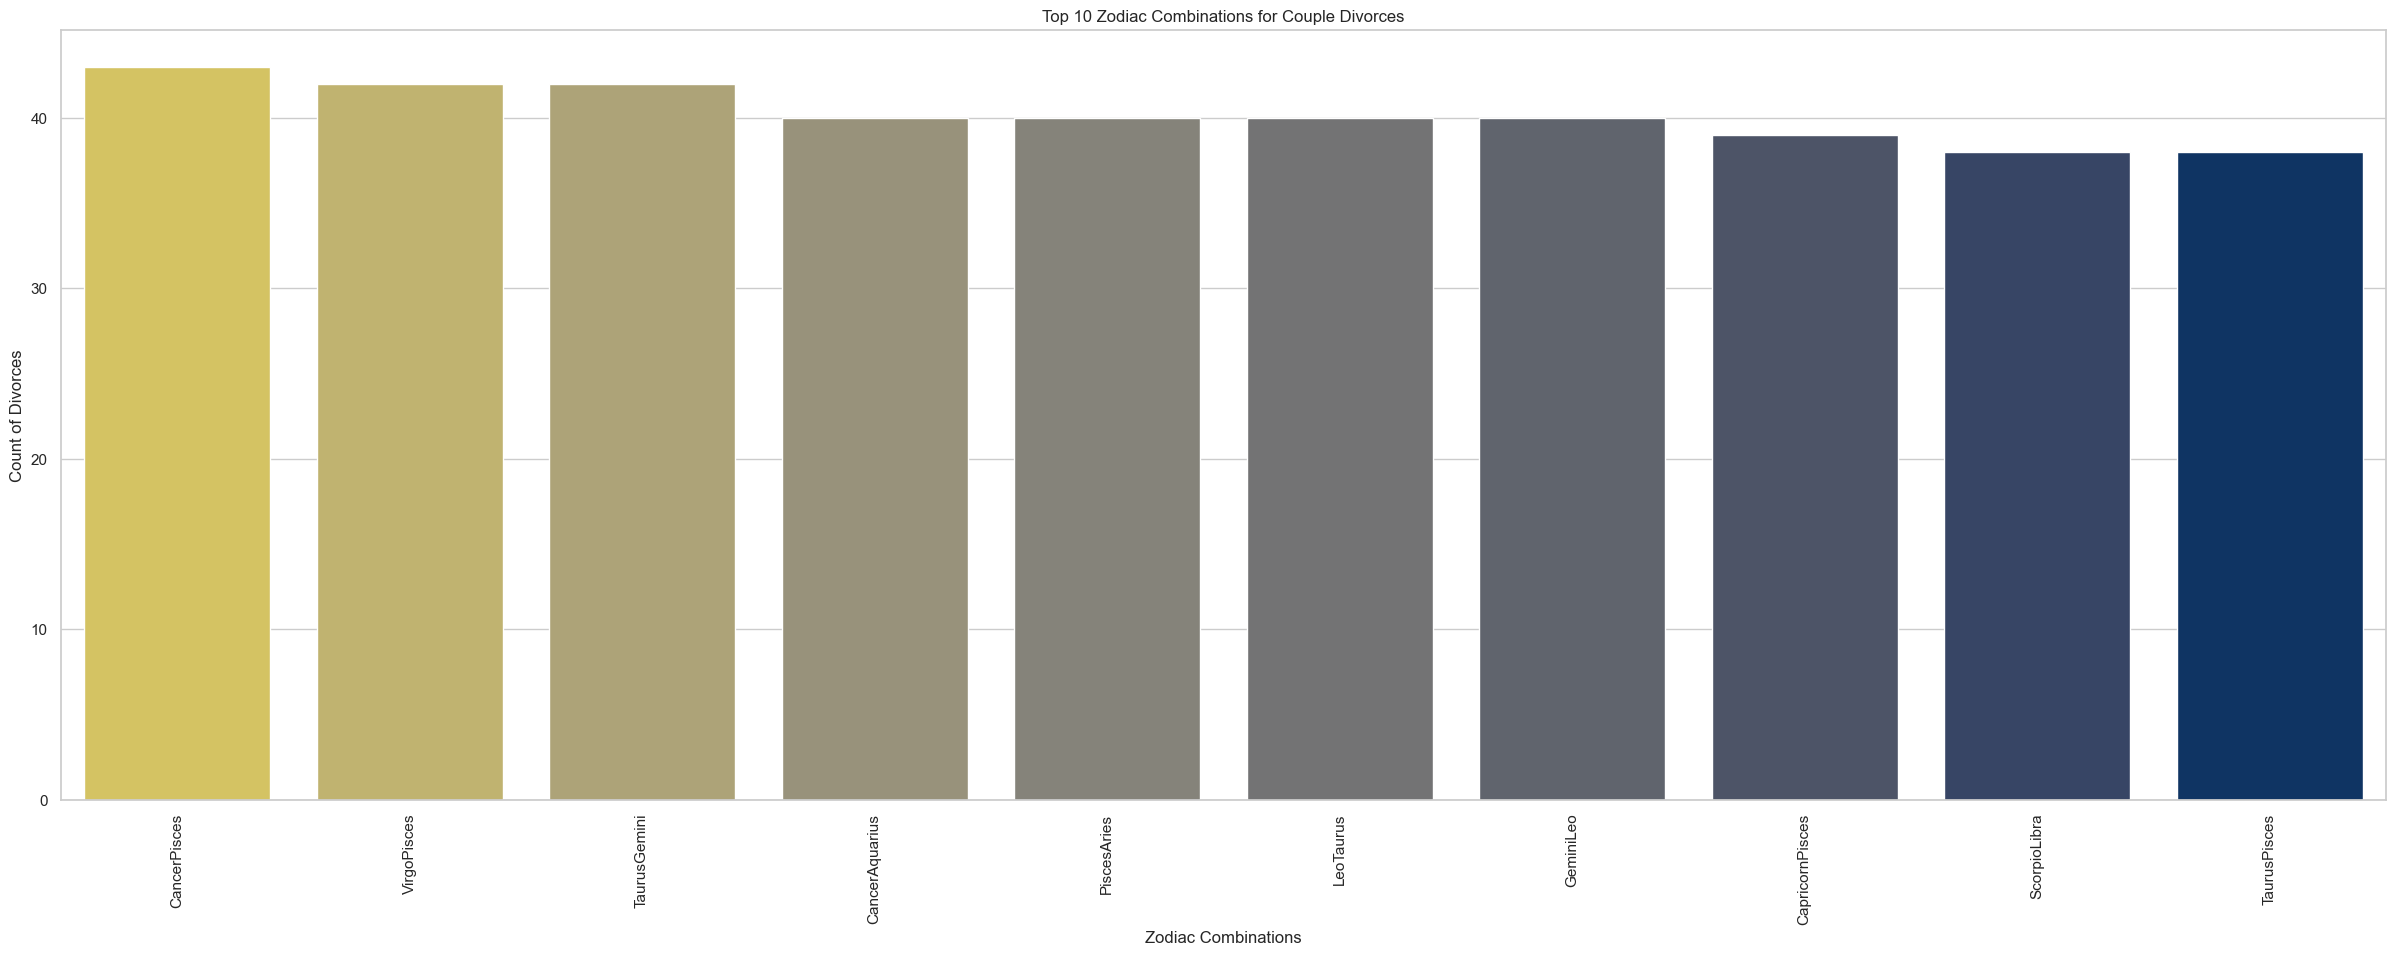

In [202]:

# Assuming 'divorce_data' is your DataFrame
plt.figure(figsize=(30, 10))
top_combinations = divorce_data['Zodiac_combinations'].value_counts().head(10)
plot = sns.barplot(x=top_combinations.index, y=top_combinations, palette="cividis_r")
plot.set_title('Top 10 Zodiac Combinations for Couple Divorces')
plt.xlabel("Zodiac Combinations")
plt.ylabel("Count of Divorces")
plt.xticks(rotation=90)
plt.show()


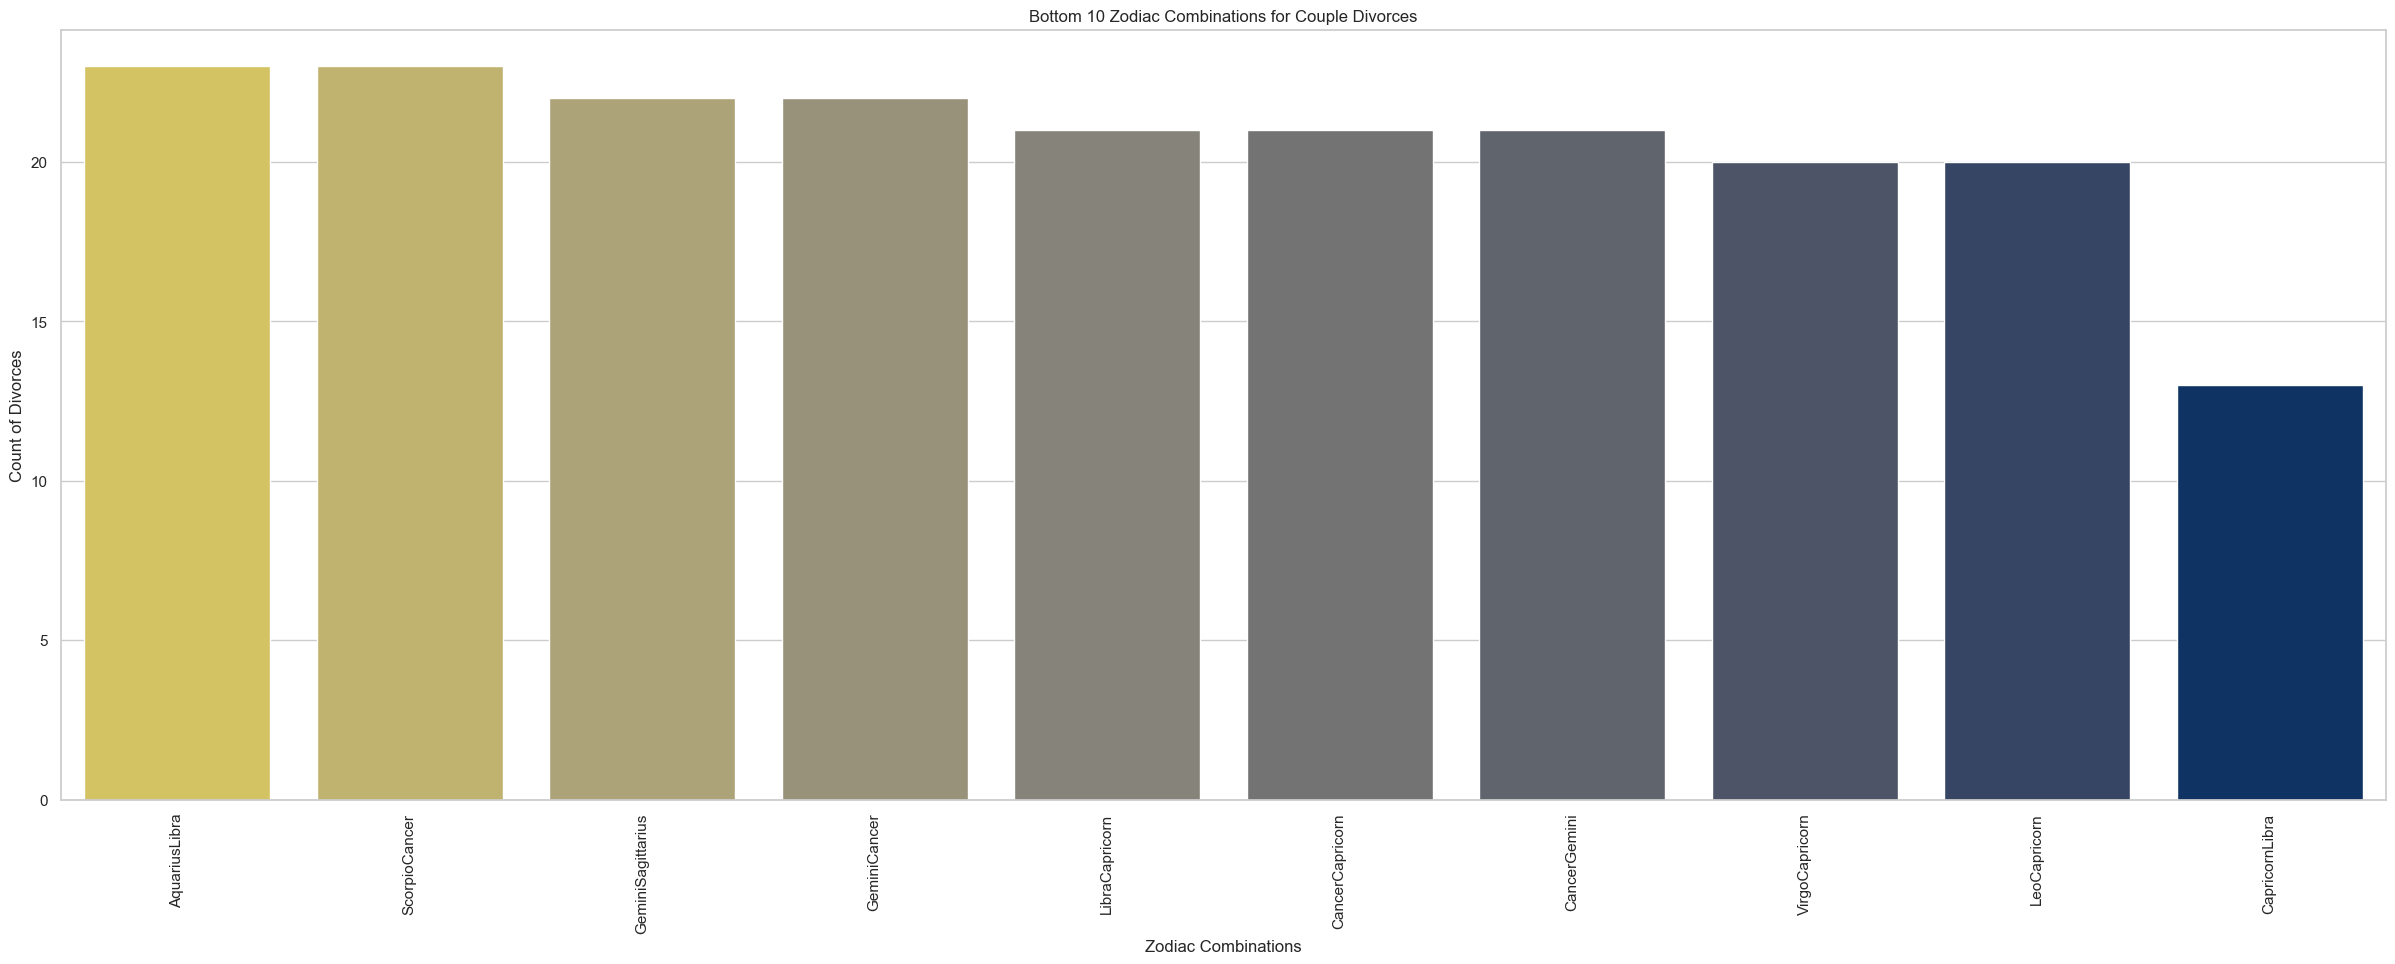

In [203]:

plt.figure(figsize=(30, 10))
bottom_combinations = divorce_data['Zodiac_combinations'].value_counts().tail(10)
plot = sns.barplot(x=bottom_combinations.index, y=bottom_combinations, palette="cividis_r")
plot.set_title('Bottom 10 Zodiac Combinations for Couple Divorces')
plt.xlabel("Zodiac Combinations")
plt.ylabel("Count of Divorces")
plt.xticks(rotation=90)
plt.show()


In [204]:
divorce_data

,Normalized_Marriage_lasted_rating,day_partner_1,month_partner_1,day_partner_2,month_partner_2,Zod_sign_partner_1,Zod_sign_partner_2,Zodiac_combinations
0,0.096846,18,12,1,8,Sagittarius,Leo,SagittariusLeo
2,0.512166,22,2,21,3,Pisces,Aries,PiscesAries
4,0.130313,30,10,13,10,Scorpio,Libra,ScorpioLibra
5,0.175951,28,3,14,6,Aries,Gemini,AriesGemini
6,0.255929,13,12,11,4,Sagittarius,Aries,SagittariusAries
...,...,...,...,...,...,...,...,...
4918,0.079798,29,10,1,12,Scorpio,Sagittarius,ScorpioSagittarius
4919,0.019728,11,10,2,9,Libra,Virgo,LibraVirgo
4920,0.591837,28,10,17,2,Scorpio,Aquarius,ScorpioAquarius
4921,0.513963,2,7,27,1,Cancer,Aquarius,CancerAquarius


## 1.2 Lets dive in deeper into the data

We dont need a lot of stuff from this, so keeping the required

In [205]:
divorce_data.drop(divorce_data.columns.difference(['Normalized_Marriage_lasted_rating','Zodiac_combinations','Compatibility_rate','Compatibility']), axis=1, inplace=True)

Taking the computational matrix from the predetermined compatibility values from Internet

In [206]:
comp_matrix = pd.read_csv('data/Comp_Matrix.csv')

comp_matrix.head(10) #compatibility rate - %

,Zodiac_combination,Compatibility_rate
0,CancerPisces,0.98
1,TaurusGemini,0.33
2,VirgoPisces,0.88
3,PiscesAries,0.67
4,CancerAquarius,0.27
5,GeminiLeo,0.88
6,LeoTaurus,0.73
7,CapricornPisces,0.88
8,ScorpioLibra,0.35
9,TaurusPisces,0.85


In [207]:
comp_matrix.count()

Zodiac_combination    144
Compatibility_rate    144
dtype: int64

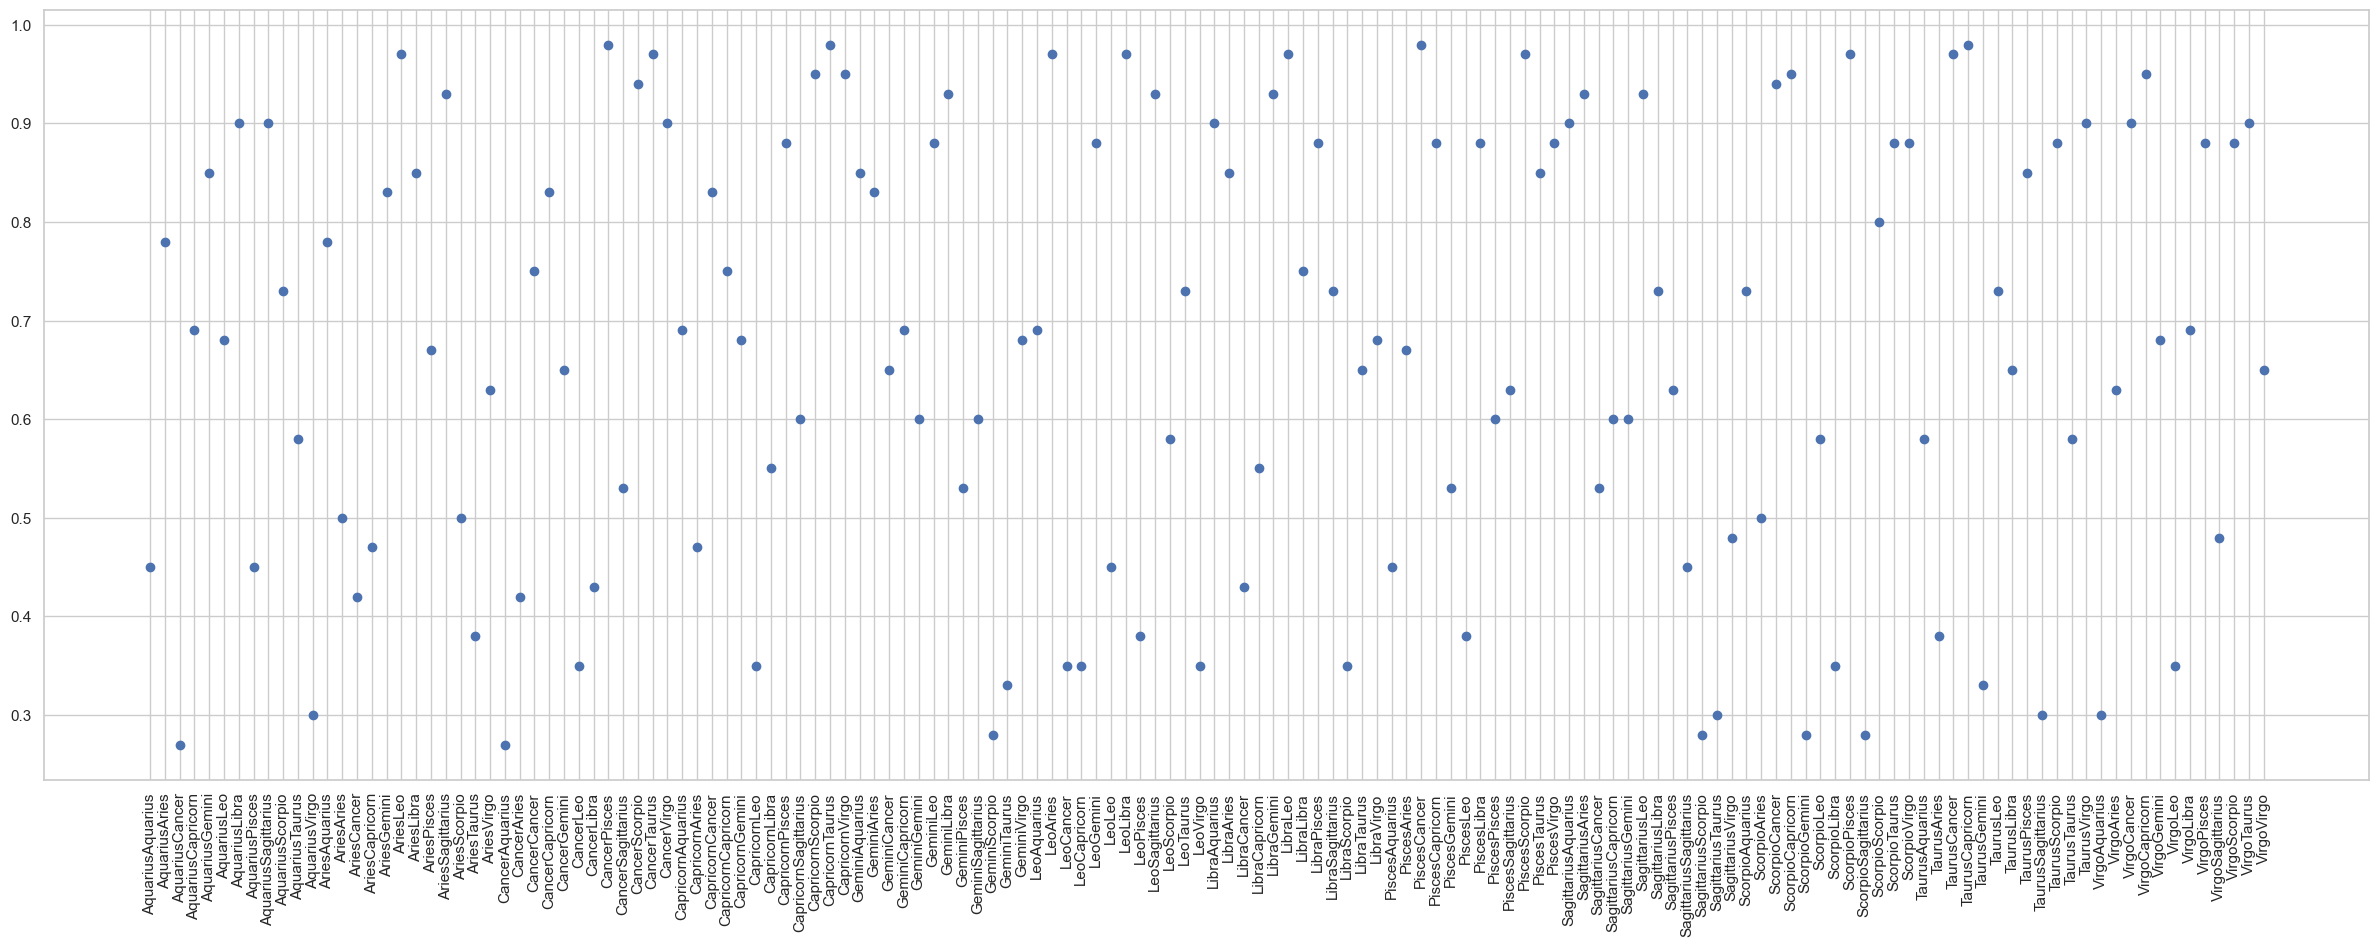

In [208]:
#making a scatter plot

plt.figure(figsize=(30,10))
x, comb = np.unique(comp_matrix['Zodiac_combination'], return_inverse=True)
plt.scatter(comb, comp_matrix['Compatibility_rate'])
plt.xticks(range(len(x)), x)
plt.xticks(rotation=90)
plt.show()

/var/folders/jm/3w1dz5w55nj8bqyr7t76_qr00000gn/T/ipykernel_21625/1203033770.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(comp_matrix['Compatibility_rate'], fit=norm);


Text(0.5, 0, '')

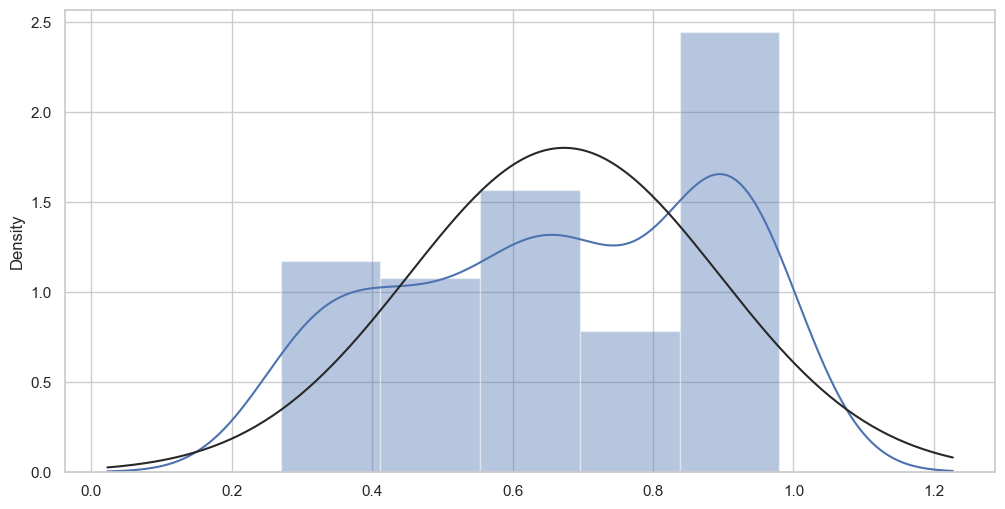

In [209]:
#see the histogram for the normal distribution
plt.figure(figsize=(12,6))
sns.distplot(comp_matrix['Compatibility_rate'], fit=norm);
plt.xlabel("")

In [210]:
#see the max/min, mean etc.
comp_matrix['Compatibility_rate'].describe()


count    144.000000
mean       0.673472
std        0.222363
min        0.270000
25%        0.480000
50%        0.680000
75%        0.880000
max        0.980000
Name: Compatibility_rate, dtype: float64

__Lets label compatibility according to the mean__

In [211]:
#setting the categories
compatibility_fit_labels = ['Bad_fit', 'Good_fit']

#creating a new col for the categories
comp_matrix['Compatibility'] = pd.qcut(comp_matrix['Compatibility_rate'], q= [0, .5, 1], labels=compatibility_fit_labels)

In [212]:
#seeing how many values in each category
comp_matrix['Compatibility'].value_counts()

Compatibility
Bad_fit     73
Good_fit    71
Name: count, dtype: int64

In [213]:
divorce_data

,Normalized_Marriage_lasted_rating,Zodiac_combinations
0,0.096846,SagittariusLeo
2,0.512166,PiscesAries
4,0.130313,ScorpioLibra
5,0.175951,AriesGemini
6,0.255929,SagittariusAries
...,...,...
4918,0.079798,ScorpioSagittarius
4919,0.019728,LibraVirgo
4920,0.591837,ScorpioAquarius
4921,0.513963,CancerAquarius


In [214]:
#rename the col for future dataframes join
comp_matrix = comp_matrix.rename(columns={'Zodiac_combination': 'Zodiac_combinations'})

#joining the datframes
cols = ['Zodiac_combinations']
divorce_data = divorce_data.join(comp_matrix.set_index(cols), on=cols)


In [215]:
divorce_data

,Normalized_Marriage_lasted_rating,Zodiac_combinations,Compatibility_rate,Compatibility
0,0.096846,SagittariusLeo,0.93,Good_fit
2,0.512166,PiscesAries,0.67,Bad_fit
4,0.130313,ScorpioLibra,0.35,Bad_fit
5,0.175951,AriesGemini,0.83,Good_fit
6,0.255929,SagittariusAries,0.93,Good_fit
...,...,...,...,...
4918,0.079798,ScorpioSagittarius,0.28,Bad_fit
4919,0.019728,LibraVirgo,0.68,Bad_fit
4920,0.591837,ScorpioAquarius,0.73,Good_fit
4921,0.513963,CancerAquarius,0.27,Bad_fit


In [216]:

#dropping all coloumns except partners' birth dates
divorce_data.drop(divorce_data.columns.difference(['Normalized_Marriage_lasted_rating','Zodiac_combinations','Compatibility_rate','Compatibility']), axis=1, inplace=True)
divorce_data

,Normalized_Marriage_lasted_rating,Zodiac_combinations,Compatibility_rate,Compatibility
0,0.096846,SagittariusLeo,0.93,Good_fit
2,0.512166,PiscesAries,0.67,Bad_fit
4,0.130313,ScorpioLibra,0.35,Bad_fit
5,0.175951,AriesGemini,0.83,Good_fit
6,0.255929,SagittariusAries,0.93,Good_fit
...,...,...,...,...
4918,0.079798,ScorpioSagittarius,0.28,Bad_fit
4919,0.019728,LibraVirgo,0.68,Bad_fit
4920,0.591837,ScorpioAquarius,0.73,Good_fit
4921,0.513963,CancerAquarius,0.27,Bad_fit


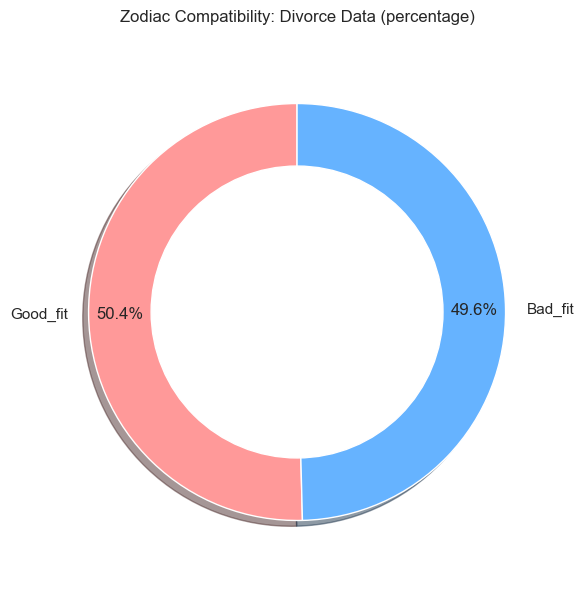

In [217]:
# plotting a pie chart, to see how actually zodiac compatibility is distributed across the divorce dataset in percentage

labels = ['Good_fit', 'Bad_fit']
sizes = divorce_data['Compatibility'].value_counts()
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors = colors, shadow=True, startangle=90, pctdistance=0.85)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.set_size_inches(6,6)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.title('Zodiac Compatibility: Divorce Data (percentage)')
plt.show()

Text(0, 0.5, '')

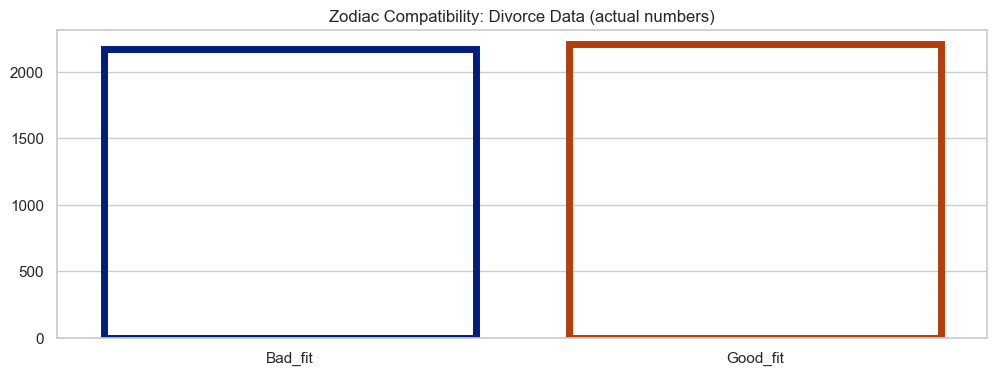

In [218]:
#plotting a chart to see how zodiac compatibility is distributed across the divorce dataset in actual numbers
plt.figure(figsize=(12,4))
plot = sns.countplot(x="Compatibility", data=divorce_data, facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3)).set_title('Zodiac Compatibility: Divorce Data (actual numbers)')
plt.xlabel("")
plt.ylabel("")

In [219]:
#see the number 
divorce_data['Compatibility'].value_counts()

Compatibility
Good_fit    2205
Bad_fit     2169
Name: count, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143],
 [Text(0, 0, 'SagittariusLeo'),
  Text(1, 0, 'PiscesAries'),
  Text(2, 0, 'ScorpioLibra'),
  Text(3, 

<Figure size 3000x1000 with 0 Axes>

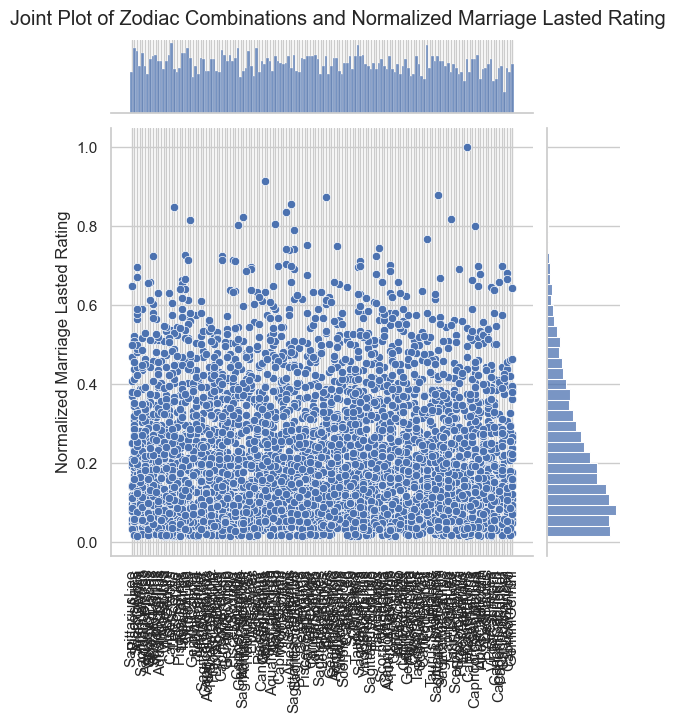

In [220]:
plt.figure(figsize=(30, 10))
joint_plot = sns.jointplot(x='Zodiac_combinations', y='Normalized_Marriage_lasted_rating', data=divorce_data)
joint_plot.fig.suptitle('Joint Plot of Zodiac Combinations and Normalized Marriage Lasted Rating', y=1.02)
plt.xlabel("")
plt.ylabel("Normalized Marriage Lasted Rating")
plt.xticks(rotation=90)


In [221]:
#setting the categories
compatibility_Marriage_lasted_rating_fit_labels = ['Bad_Marriage_lasted_rating', 'Good_Marriage_lasted_rating']

#creating a new col for the categories
divorce_data['compatibility_Marriage_lasted_rating'] = pd.qcut(divorce_data['Normalized_Marriage_lasted_rating'], q= [0, .5, 1], labels=compatibility_Marriage_lasted_rating_fit_labels)
divorce_data.head()

,Normalized_Marriage_lasted_rating,Zodiac_combinations,Compatibility_rate,Compatibility,compatibility_Marriage_lasted_rating
0,0.096846,SagittariusLeo,0.93,Good_fit,Bad_Marriage_lasted_rating
2,0.512166,PiscesAries,0.67,Bad_fit,Good_Marriage_lasted_rating
4,0.130313,ScorpioLibra,0.35,Bad_fit,Bad_Marriage_lasted_rating
5,0.175951,AriesGemini,0.83,Good_fit,Bad_Marriage_lasted_rating
6,0.255929,SagittariusAries,0.93,Good_fit,Good_Marriage_lasted_rating


In [222]:
divorce_data['compatibility_Marriage_lasted_rating'].value_counts()

compatibility_Marriage_lasted_rating
Bad_Marriage_lasted_rating     2189
Good_Marriage_lasted_rating    2184
Name: count, dtype: int64

In [223]:
divorce_data_good_fit = divorce_data[divorce_data['Compatibility']=='Good_fit']
divorce_data_good_fit.head()
divorce_data_bad_fit  = divorce_data[divorce_data['Compatibility']=='Bad_fit']
divorce_data_bad_fit

,Normalized_Marriage_lasted_rating,Zodiac_combinations,Compatibility_rate,Compatibility,compatibility_Marriage_lasted_rating
2,0.512166,PiscesAries,0.67,Bad_fit,Good_Marriage_lasted_rating
4,0.130313,ScorpioLibra,0.35,Bad_fit,Bad_Marriage_lasted_rating
7,0.137904,AquariusVirgo,0.30,Bad_fit,Bad_Marriage_lasted_rating
8,0.037379,AquariusPisces,0.45,Bad_fit,Bad_Marriage_lasted_rating
12,0.065760,VirgoAquarius,0.30,Bad_fit,Bad_Marriage_lasted_rating
...,...,...,...,...,...
4917,0.452936,VirgoSagittarius,0.48,Bad_fit,Good_Marriage_lasted_rating
4918,0.079798,ScorpioSagittarius,0.28,Bad_fit,Bad_Marriage_lasted_rating
4919,0.019728,LibraVirgo,0.68,Bad_fit,Bad_Marriage_lasted_rating
4921,0.513963,CancerAquarius,0.27,Bad_fit,Good_Marriage_lasted_rating


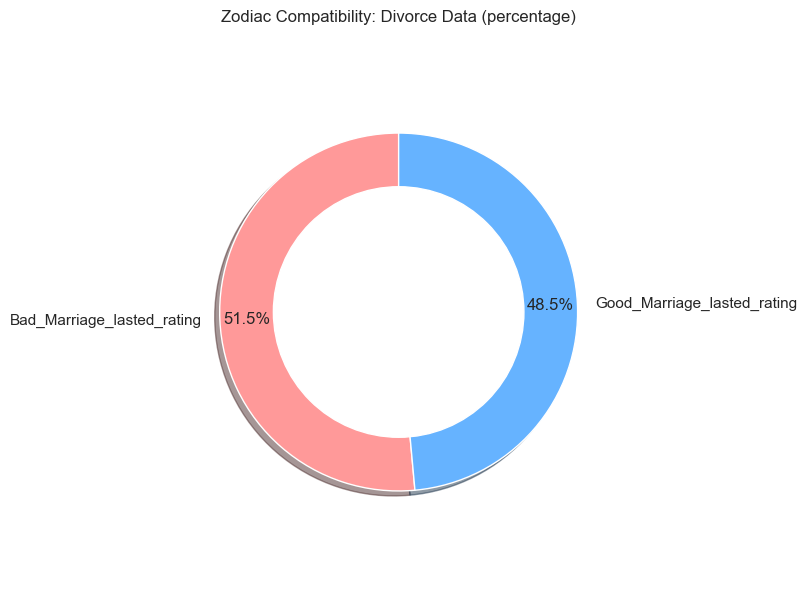

In [224]:
# plotting a pie chart, to see how actually zodiac compatibility is distributed across the divorce dataset in percentage

# labels = ['Good_fit', 'Bad_fit']
labels = ['Bad_Marriage_lasted_rating', 'Good_Marriage_lasted_rating']

sizes = divorce_data_bad_fit['compatibility_Marriage_lasted_rating'].value_counts()
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors = colors, shadow=True, startangle=90, pctdistance=0.85)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.set_size_inches(8,6)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.title('Zodiac Compatibility: Divorce Data (percentage)')
plt.show()

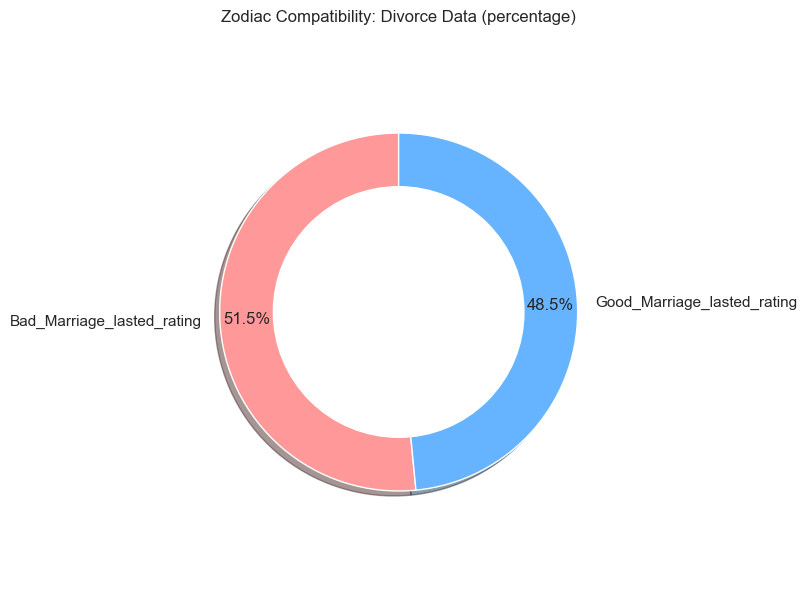

In [225]:
# plotting a pie chart, to see how actually zodiac compatibility is distributed across the divorce dataset in percentage

# labels = ['Good_fit', 'Bad_fit']
labels = ['Bad_Marriage_lasted_rating', 'Good_Marriage_lasted_rating']

sizes = divorce_data_good_fit['compatibility_Marriage_lasted_rating'].value_counts()
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors = colors, shadow=True, startangle=90, pctdistance=0.85)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.set_size_inches(8,6)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.title('Zodiac Compatibility: Divorce Data (percentage)')
plt.show()

__Almost a 50-50 for both bad fit and good fit which means individually zodiac signs have almost negligible influence on divorce rates according to this data!!__

__Deep Insights:__

With the data collected on the divorces in the city of Xalapa, Mexico (2000-2015), we could get some insights below:

As we can see in Figure of Men Zodiac Signs and Women Zodiac Signs, the number of divorces for the twelve zodiac signs for both category (man and woman) are not significantly different. This indicates that zodiac sign would not just be a thing to blame for the divorces.

Looking into Men Zodiac Signs, the top 3 zodiac with most divorces for man category are Virgo, Cancer, and Scorpio. As for Women Zodiac Signs, the first and third place belong to Virgo and Scorpio (same as man category); where our second place goes to Pisces. Another interesting thing about these Figures is that Capricorn is able to save its spot for the least divorces in both of the category.

In Top 10 Zodiac Combinations for divorces, this is where we could spot the top 10 zodiac couples with most divorces. According to our dataset, maybe it would be best to avoid pisces and virgo, sagittarius and virgo, as well as scorpio and virgo combination since they are the top 3 most divorces in the list.

In Bottom 10 Zodiac Combinations for divorces, In this graph, we can see the 12 zodiac couples with the least number of divorces.  

__So we can almost say that Zodiac Signs wont infleunce the divorces single handedly!!__

__How would the people who believe in Horoscopes fully react to this ?__

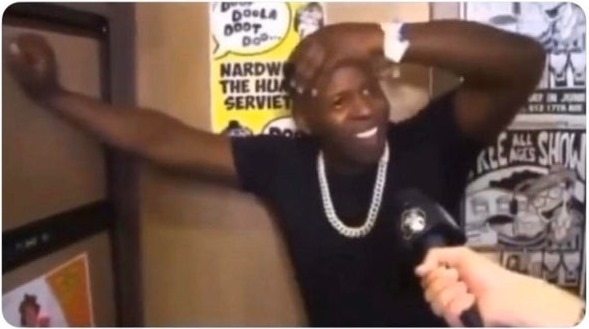

#### let's take different view of the data

In [226]:
divorce_data = pd.read_csv('data/divorces_2000-2015_translated.csv')
## Select the applicable columns
divorces = divorce_data.loc[:,['DOB_partner_man','DOB_partner_woman']]
## Replace any blanks with 'NaN' using a regex replacement
divorces = divorces.replace(r'^s*$', float('NaN'), regex = True)

## Remove any rows with 'NaN'
divorces.dropna(inplace = True)

## Let's take a look at the birthday data
print(divorces['DOB_partner_man'])
## We see that the format is DD/MM/YY, which is not optimal. So let's convert the respective DOB columns to datetime format
divorces["DOB_partner_man"] = pd.to_datetime(divorces['DOB_partner_man'],dayfirst=True)
divorces["DOB_partner_woman"] = pd.to_datetime(divorces['DOB_partner_woman'],dayfirst=True)
print(divorces['DOB_partner_man'].sort_values())

## Define a function that fixes the erronous 4-digit years
def fix_year(birthday):
    if birthday.year > 1985:
        return birthday.replace(year=birthday.year-100)
    return birthday
## Fix the erronous birthday years
divorces['DOB_partner_man'] = divorces['DOB_partner_man'].apply(lambda x: fix_year(x) if not pd.isna(x) else x)
divorces['DOB_partner_woman'] = divorces['DOB_partner_woman'].apply(lambda x: fix_year(x) if not pd.isna(x) else x)

print(divorces['DOB_partner_man'].sort_values())


0       18/12/75
2        22/2/55
4       30/10/75
5        28/3/73
6       13/12/70
          ...   
4918    29/10/77
4919    10/11/82
4920    28/10/54
4921      7/2/58
4922     22/6/60
Name: DOB_partner_man, Length: 4374, dtype: object
3270   1973-01-01
4349   1973-01-07
3385   1973-01-07
265    1973-01-07
3149   1973-01-08
          ...    
97     2072-12-17
3441   2072-12-18
4630   2072-12-21
1428   2072-12-27
1270   2072-12-31
Name: DOB_partner_man, Length: 4374, dtype: datetime64[ns]
2166   1886-01-01
3781   1886-01-13
151    1886-01-27
4064   1886-03-12
1326   1886-04-30
          ...    
254    1985-12-05
4831   1985-12-09
2160   1985-12-15
4406   1985-12-24
3540   1985-12-26
Name: DOB_partner_man, Length: 4374, dtype: datetime64[ns]


/var/folders/jm/3w1dz5w55nj8bqyr7t76_qr00000gn/T/ipykernel_21625/974780397.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  divorces["DOB_partner_man"] = pd.to_datetime(divorces['DOB_partner_man'],dayfirst=True)
/var/folders/jm/3w1dz5w55nj8bqyr7t76_qr00000gn/T/ipykernel_21625/974780397.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  divorces["DOB_partner_woman"] = pd.to_datetime(divorces['DOB_partner_woman'],dayfirst=True)


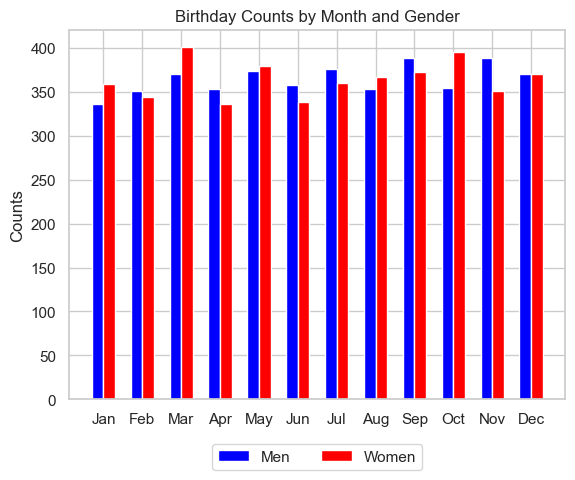

In [227]:
## Let's take a look at the distribution of birthdays for men and women

## Extract the month from each birthday field
divorces['month_man'] = divorces['DOB_partner_man'].dt.month
divorces['month_woman'] = divorces['DOB_partner_woman'].dt.month

## Group by month
grouped_month_men = divorces.groupby('month_man')
grouped_month_women = divorces.groupby('month_woman')

## Get the counts of rows in each group
men_month_count = grouped_month_men.size().reset_index(name='count')
women_month_count = grouped_month_women.size().reset_index(name='count')

## Extract just the counts
men_counts = men_month_count['count']
women_counts = women_month_count['count']

## Create x-axis labels for the bar chart
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

## Create the bar chart
x = range(len(men_counts))
plt.bar(x, men_counts, color='blue', width=0.3, label='Men')
plt.bar([i + 0.3 for i in x], women_counts, color='red', width=0.3, label='Women')

## Add labels, a title, and legend
plt.xticks([i + 0.15 for i in x], months)
plt.ylabel('Counts')
plt.title('Birthday Counts by Month and Gender')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

## Show the chart
plt.show()

In [228]:
def get_sign(birthday):
    month, day = birthday.month, birthday.day
    return zodiac_sign(day,month)

In [229]:
## Map star signs to birthdays
divorces['sign_man'] = divorces['DOB_partner_man'].apply(lambda x: get_sign(x))
divorces['sign_woman'] = divorces['DOB_partner_woman'].apply(lambda x: get_sign(x))

In [230]:
divorces

,DOB_partner_man,DOB_partner_woman,month_man,month_woman,sign_man,sign_woman
0,1975-12-18,1983-01-08,12,1,Sagittarius,Capricorn
2,1955-02-22,1947-03-21,2,3,Pisces,Aries
4,1975-10-30,1978-10-13,10,10,Scorpio,Libra
5,1973-03-28,1976-06-14,3,6,Aries,Gemini
6,1970-12-13,1971-11-04,12,11,Sagittarius,Scorpio
...,...,...,...,...,...,...
4918,1977-10-29,1978-01-12,10,1,Scorpio,Capricorn
4919,1982-11-10,1981-02-09,11,2,Scorpio,Aquarius
4920,1954-10-28,1957-02-17,10,2,Scorpio,Aquarius
4921,1958-02-07,1964-01-27,2,1,Aquarius,Aquarius


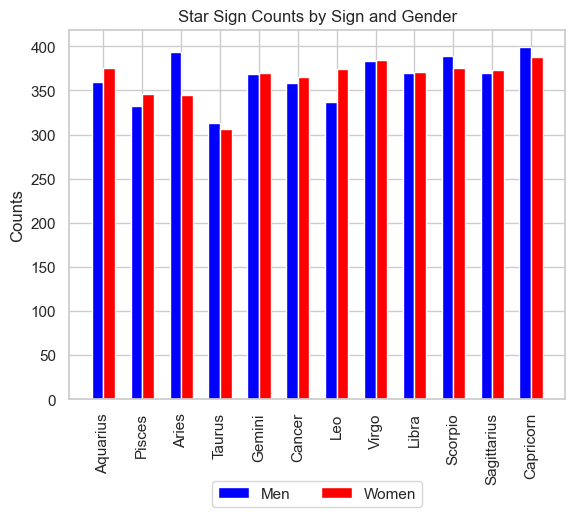

In [231]:
## Let's take a look at the distribution of star signs by gender
## Create a dictionary that maps start date and end date to each star sign
star_signs = {'Aquarius': (1, 20, 2, 18),
             'Pisces': (2, 19, 3, 20),
             'Aries': (3, 21, 4, 19),
             'Taurus': (4, 20, 5, 20),
             'Gemini': (5, 21, 6, 20),
             'Cancer': (6, 21, 7, 22),
             'Leo': (7, 23, 8, 22),
             'Virgo': (8, 23, 9, 22),
             'Libra': (9, 23, 10, 22),
             'Scorpio': (10, 23, 11, 21),
             'Sagittarius': (11, 22, 12, 21),
             'Capricorn': (12, 22, 1, 19)}
## Group by sign
grouped_sign_men = divorces.groupby('sign_man')
grouped_sign_women = divorces.groupby('sign_woman')

## Get the counts of rows in each group
men_sign_count = grouped_sign_men.size().reset_index(name='count')
women_sign_count = grouped_sign_women.size().reset_index(name='count')

## Extract just the counts
men_count = men_sign_count['count']
women_count = women_sign_count['count']

## Create the bar chart
x = range(len(men_count))
plt.bar(x, men_count, color='blue', width=0.3, label='Men')
plt.bar([i + 0.3 for i in x], women_count, color='red', width=0.3, label='Women')

## Add labels, a title, and legend
plt.xticks([i + 0.15 for i in x], star_signs.keys(), rotation=90)
plt.ylabel('Counts')
plt.title('Star Sign Counts by Sign and Gender')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

## Show the chart
plt.show()

Again, this looks reasonable. The range for each sign is close to the others. The star sign data does not appear to be quite as uniformly distributed as the monthly data, but overall it looks ok. So let's keep going.

In [232]:
## Count the number of occurrences of each star sign combination

## Create a crosstab of the star sign columns for men and women, respectively
star_sign_combinations = pd.crosstab(divorces['sign_man'], divorces['sign_woman'])

## Add the transpose of the crosstab to itself to count the number of sign combinations irrespective of gender.  
## E.g. The cases [man = Aquarius, woman = Gemini] and [man = Gemini, woman = Aquarius] would tally in the same bucket
star_sign_combinations = (star_sign_combinations + star_sign_combinations.T)

# Replace the diagonal with the original counts to avoid double-counting Same-Sign Combinations
np.fill_diagonal(star_sign_combinations.values, np.diag(star_sign_combinations) / 2)

# Create a mask for the lower triangle
mask = np.tril(np.ones_like(star_sign_combinations, dtype=bool))

# Set the values in the lower triangle to nan to keep the visualization clean
star_sign_combinations = star_sign_combinations.where(mask, np.nan)

In [233]:
## Confirm that our total number of records in the crosstab is equal to the original number of rows in the dataframe
print(star_sign_combinations.sum().sum())
print(divorces['DOB_partner_man'].shape[0])

4374.0
4374


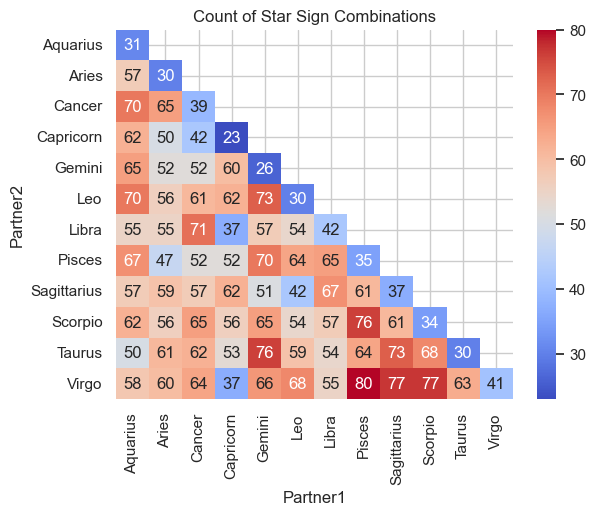

In [234]:
## Plot the consolidated crosstab counts data as a heatmap
sns.heatmap(star_sign_combinations, annot=True, cmap='coolwarm')

# Add title and labels
plt.title('Count of Star Sign Combinations')
plt.xlabel('Partner1')
plt.ylabel('Partner2')

# Show the plot
plt.show()

Now we have discovered something interesting.

__What can be figured out:__ Same-Sign Combinations along the diagonal of the crosstab are all low relative to the entire distribution.

In [235]:
## Let's take a look at some summary statistics

max = star_sign_combinations.max().max()
min = star_sign_combinations.min().min()
mean = star_sign_combinations.mean().mean()
median = star_sign_combinations.median().median()
std_dev = star_sign_combinations.std().mean()

print("Max: {:.0f}".format(max))
print("Min: {:.0f}".format(min))
print("Mean: {:.2f}".format(mean))
print("Median: {:.2f}".format(median))
print("Std. Dev: {:.2f}".format(std_dev))

Max: 80
Min: 23
Mean: 55.04
Median: 57.50
Std. Dev: 14.90


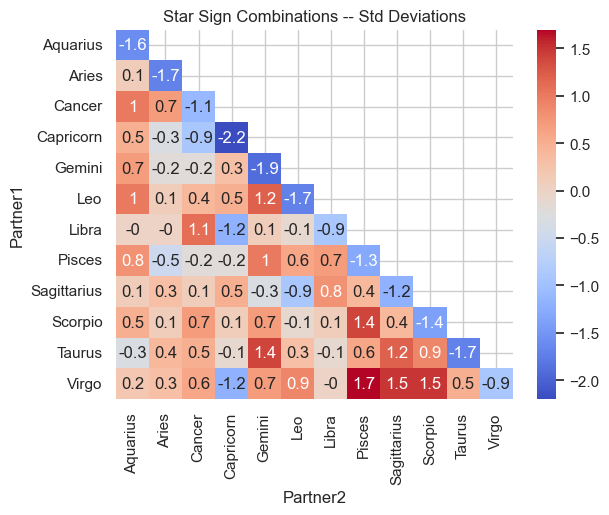

In [236]:
## Let's see the counts represented as the number of standard deviations away from the mean
star_sign_combinations_stddev = ((star_sign_combinations - mean) / std_dev)

## Plot the data as a heatmap
sns.heatmap(star_sign_combinations_stddev.round(1), annot=True, cmap='coolwarm')

## Add title and labels
plt.title('Star Sign Combinations -- Std Deviations')
plt.xlabel('Partner2')
plt.ylabel('Partner1')

## Show the plot
plt.show()

__Conclusion for zodiac compatibility part of the project__:

 Same-Sign Combinations accounting for less divorces overall.

Further Questions:



So How about we find different features actually affecting the divorces?

###   Now that we know that we cant analyse only on the basis of Zodiac signs, lets dive deeper into the dataset to find some of other features which might influence the divorce rate

In [237]:
df_raw = pd.read_csv('data/divorces_2000-2015_translated.csv')

In [238]:

df_raw.head()

,Divorce_date,Type_of_divorce,Nationality_partner_man,DOB_partner_man,Place_of_birth_partner_man,Birth_municipality_of_partner_man,Birth_federal_partner_man,Birth_country_partner_man,Age_partner_man,Residence_municipality_partner_man,...,Marriage_certificate_municipality,Marriage_certificate_federal,Level_of_education_partner_man,Employment_status_partner_man,Level_of_education_partner_woman,Employment_status_partner_woman,Marriage_duration,Marriage_duration_months,Num_Children,Custody
0,9/6/06,Necesario,MEXICANA,18/12/75,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,30.0,XALAPA,...,XALAPA,VERACRUZ,SECUNDARIA,OBRERO,SECUNDARIA,EMPLEADO,5.0,NaN,1.0,NaN
1,1/2/00,Voluntario,MEXICANA,NaN,NaN,NaN,NaN,NaN,47.0,NaN,...,XALAPA,VERACRUZ,PREPARATORIA,ESTABLECIMIENTO,PREPARATORIA,EMPLEADO,NaN,NaN,NaN,NaN
2,1/2/05,Necesario,MEXICANA,22/2/55,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,49.0,NaN,...,XALAPA,VERACRUZ,PREPARATORIA,OBRERO,NaN,TRABAJADOR POR CUENTA PROPIA EN VIA PUBLICA,NaN,NaN,NaN,NaN
3,1/2/06,Necesario,MEXICANA,20/1/64,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,42.0,XALAPA,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PREPARATORIA,EMPLEADO,18.0,NaN,2.0,MADRE
4,1/2/06,Necesario,MEXICANA,30/10/75,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,30.0,COATEPEC,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PREPARATORIA,NO TRABAJA,7.0,NaN,2.0,MADRE


In [239]:
df_raw.describe()

,Age_partner_man,Monthly_income_partner_man_peso,Age_partner_woman,Monthly_income_partner_woman_peso,Marriage_duration,Marriage_duration_months,Num_Children
count,4816.000000,3.504000e+03,4772.000000,2804.000000,4688.000000,1555.000000,3011.000000
mean,39.443729,1.092011e+04,36.958089,7374.254094,11.723549,6.293891,1.815344
std,10.396888,7.056976e+04,9.934723,16337.048502,9.298888,3.865557,0.930711
min,19.000000,2.400000e+00,17.000000,3.500000,1.000000,0.000000,1.000000
25%,32.000000,3.000000e+03,29.000000,3000.000000,4.000000,4.000000,1.000000
50%,38.000000,5.600000e+03,35.000000,5000.000000,9.000000,6.000000,2.000000
75%,46.000000,1.000000e+04,43.000000,8000.000000,17.000000,9.000000,2.000000
max,91.000000,3.150242e+06,84.000000,708652.000000,61.000000,93.000000,10.000000


In [240]:
#Check for null values

df_raw.isnull().sum()

Divorce_date                               0
Type_of_divorce                            0
Nationality_partner_man                    1
DOB_partner_man                          381
Place_of_birth_partner_man               126
Birth_municipality_of_partner_man        129
Birth_federal_partner_man                128
Birth_country_partner_man                127
Age_partner_man                          107
Residence_municipality_partner_man       324
Residence_federal_partner_man            323
Residence_country_partner_man            324
Monthly_income_partner_man_peso         1419
Occupation_partner_man                   529
Place_of_residence_partner_man           321
Nationality_partner_woman                  3
DOB_partner_woman                        452
DOB_registration_date_partner_woman     2679
Place_of_birth_partner_woman             140
Birth_municipality_of_partner_woman      139
Birth_federal_partner_woman              140
Birth_country_partner_woman              139
Age_partne

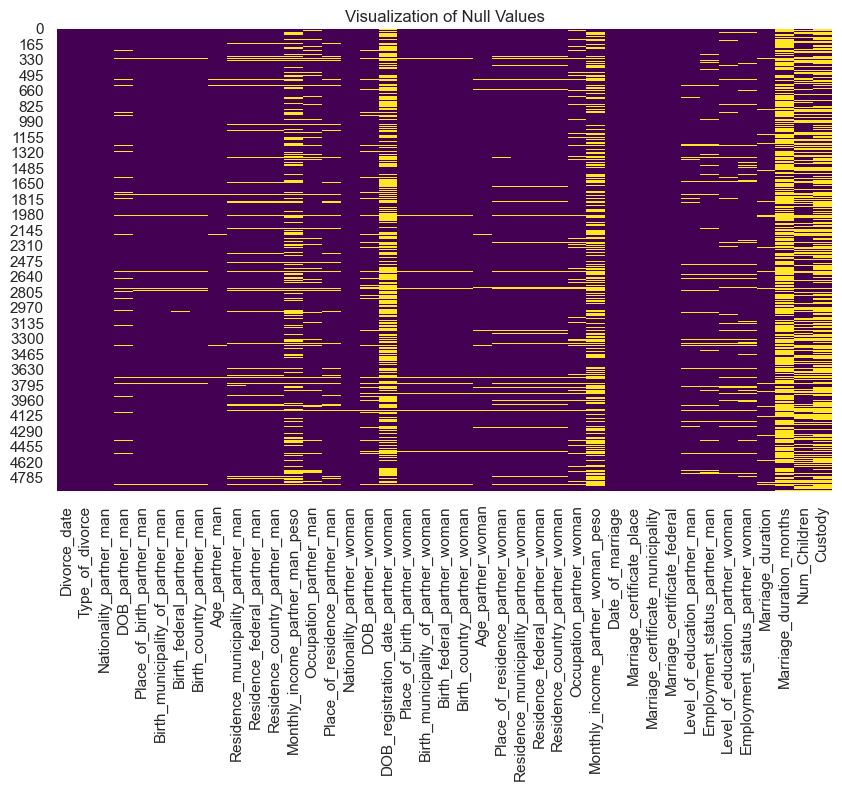

In [241]:
#Visualize null values

plt.figure(figsize=(10, 6)) 

sns.heatmap(df_raw.isnull(), cmap='viridis', cbar=False)

plt.title("Visualization of Null Values")
plt.show()

In [242]:
#Take required columns

df = df_raw[["Divorce_date",
         "Age_partner_man",
         "Occupation_partner_man",
         "Occupation_partner_woman",
         "Age_partner_woman",
         "Level_of_education_partner_man",
         "Level_of_education_partner_woman",
         "Employment_status_partner_man",
         "Employment_status_partner_woman",
         "Marriage_duration"]]

In [243]:
df = df.dropna()
df.shape

(3738, 10)

In [244]:
#Add a new column for age difference
df["Age_difference"] = df["Age_partner_man"] - df["Age_partner_woman"]

In [245]:
#Change datatypes of Marriage_duration column

df["Marriage_duration"] = df["Marriage_duration"].astype(int)

##### Relationship between Education Level and Divorce Occurences

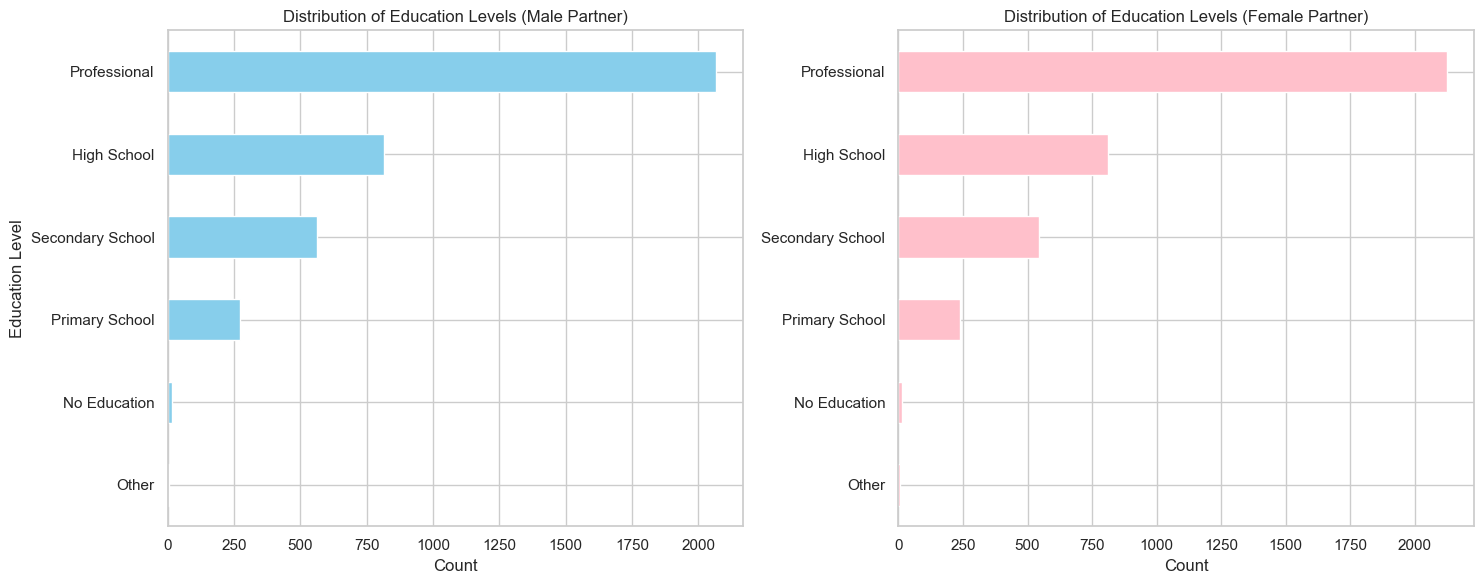

In [246]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# First Graph showing Distribution of Education Levels for male partner
df["Level_of_education_partner_man"].value_counts().sort_values().plot(kind="barh", color='skyblue', ax=axs[0])
axs[0].set_title("Distribution of Education Levels (Male Partner)")
axs[0].set_xlabel("Count")
axs[0].set_ylabel("Education Level")
education_male = [
    "Other",
    "No Education",
    "Primary School",
    "Secondary School",
    "High School",
    "Professional"
]
axs[0].set_yticks(range(len(education_male))) 
axs[0].set_yticklabels(education_male)

# Second Graph showing Distribution of Education Levels for female partner
df["Level_of_education_partner_woman"].value_counts().sort_values().plot(kind="barh", color='pink', ax=axs[1])
axs[1].set_title("Distribution of Education Levels (Female Partner)")
axs[1].set_xlabel("Count")
axs[1].set_ylabel("")
education_female = [
    "Other",
    "No Education",
    "Primary School",
    "Secondary School",
    "High School",
    "Professional"
]
axs[1].set_yticks(range(len(education_female))) 
axs[1].set_yticklabels(education_female)

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

The data suggests a potential positive correlation between higher educational attainment and increased divorce rates,this may be caused due to these people being more financially independent and belonging to urban open minded societites. The people with low educational qualifications may face financial and societal pressures acting as a detterent for divorce occurences.

##### Relationship between Age difference (age of male partner - age of female partner) and Divorce Occurences¶

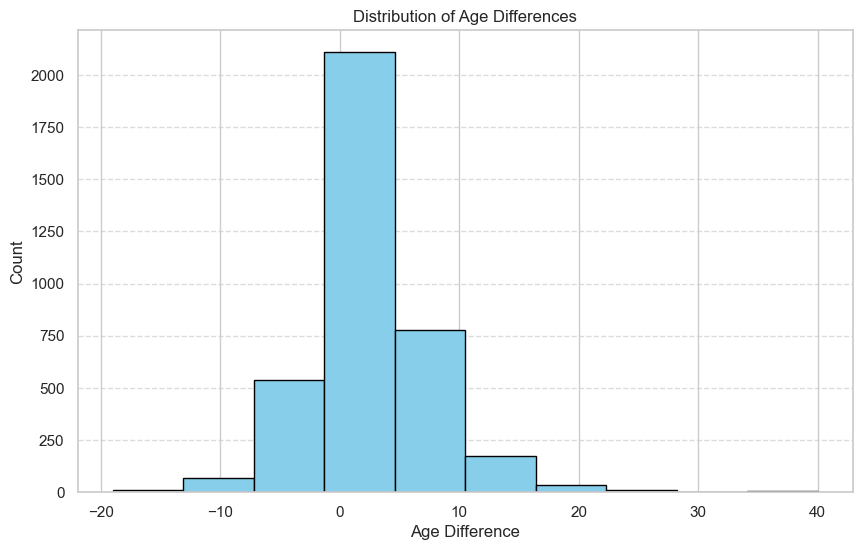

In [247]:
# Create an empty figure
plt.figure(figsize=(10, 6))

# Plot the histogram
df["Age_difference"].hist(bins=10, color='skyblue', edgecolor='black')

plt.title("Distribution of Age Differences")
plt.xlabel("Age Difference")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the Histogram
plt.show()

Prevalence of Similar Age Couples: The high frequency near 0.0 as the age difference suggests that a significant number of divorced couples had partners with the same age. This might indicate that couples with similar ages experienced divorces, challenging the notion that age similarity alone guarantees relationship stability.

Impact of Larger Age Differences: The decreasing frequency as age differences increase suggests that couples with more substantial age gaps are less common in the dataset of divorced couples. This could imply that relationships with larger age differences may be relatively more stable or less prone to divorce. But it is more probable that both of these are caused by a third variable (eg. societal custom and practices)

__Relationship between Number of Children and Divorce Occurences__

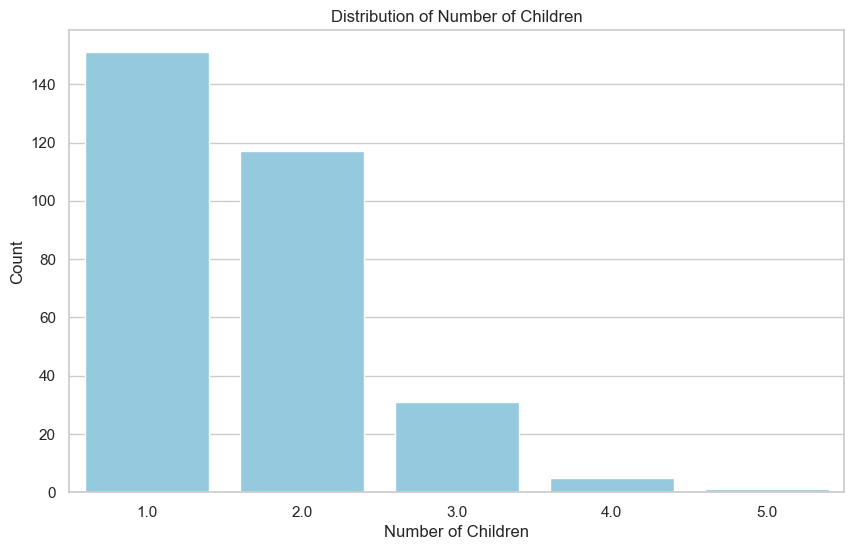

In [248]:
# Create an empty figure
plt.figure(figsize=(10, 6)) 

# Create a bar plot 
sns.countplot(x="Num_Children", data=df_raw.dropna(), color='skyblue')

plt.title("Distribution of Number of Children")
plt.xlabel("Number of Children")
plt.ylabel("Count")

# Display the plot
plt.show()

Negative Correlation: Couples with less number of children are more likely to separate.

__Relationship between Employment Status and Divorce Occurences__

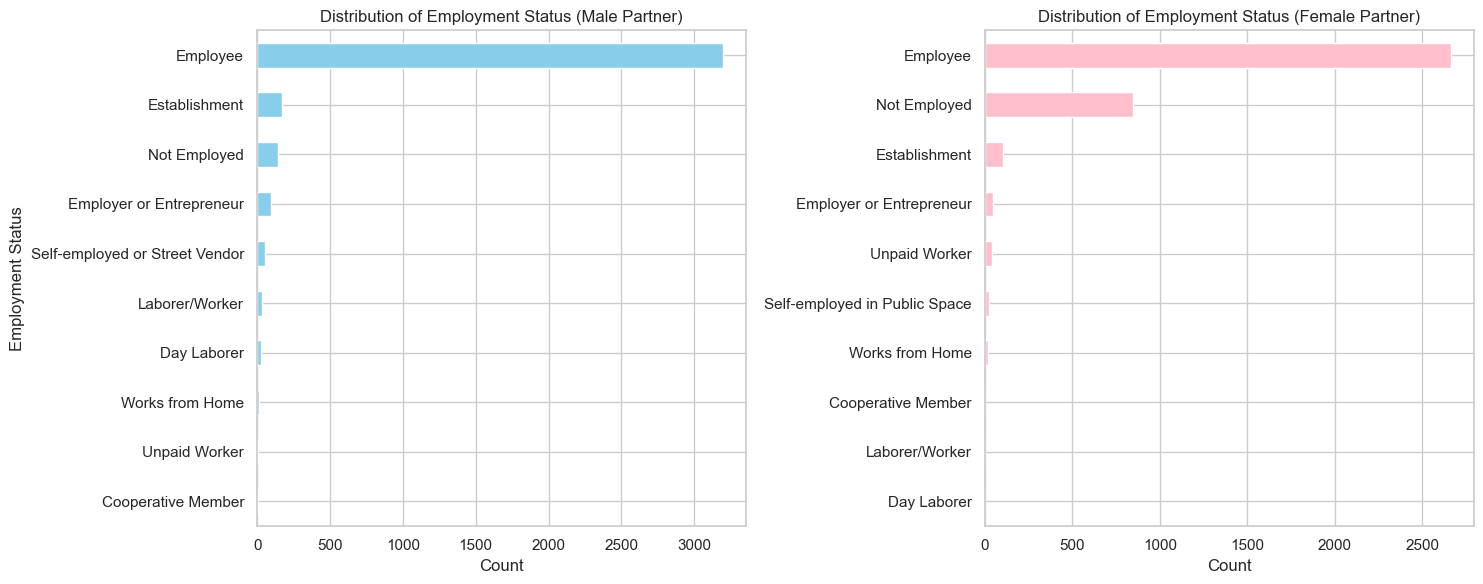

In [249]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# First Graph showing Distribution of Employment Status for male partner
df["Employment_status_partner_man"].value_counts().sort_values().plot(kind="barh", color='skyblue', ax=axs[0])
axs[0].set_title("Distribution of Employment Status (Male Partner)")
axs[0].set_xlabel("Count")
axs[0].set_ylabel("Employment Status")
english_names_male = [
    "Cooperative Member",
    "Unpaid Worker",
    "Works from Home",
    "Day Laborer",
    "Laborer/Worker",
    "Self-employed or Street Vendor",
    "Employer or Entrepreneur",
    "Not Employed",
    "Establishment",
    "Employee"
]
axs[0].set_yticks(range(len(english_names_male))) 
axs[0].set_yticklabels(english_names_male)


# Second Graph showing Distribution of Employment Status for female partner
df["Employment_status_partner_woman"].value_counts().sort_values().plot(kind="barh", color='pink', ax=axs[1])
axs[1].set_title("Distribution of Employment Status (Female Partner)")
axs[1].set_xlabel("Count")
axs[1].set_ylabel("", fontsize=2) 
english_names_female = [
    "Day Laborer",
    "Laborer/Worker",
    "Cooperative Member",
    "Works from Home",
    "Self-employed in Public Space",
    "Unpaid Worker",
    "Employer or Entrepreneur",
    "Establishment",
    "Not Employed",
    "Employee"
]
axs[1].set_yticks(range(len(english_names_female))) 
axs[1].set_yticklabels(english_names_female) 


# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

##### What are the top Occupations with most number of Divorce Occurences?

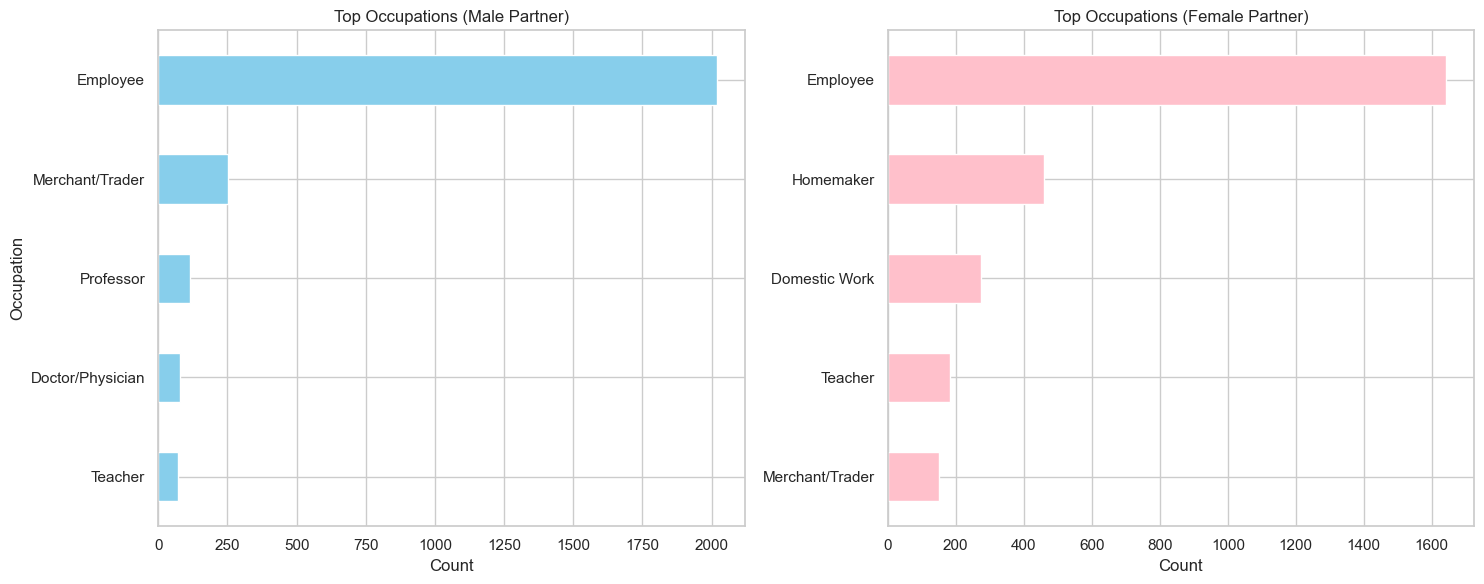

In [250]:
# Set gridstyle
sns.set(style="whitegrid")

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# First Graph showing top Occupations for male partner
df["Occupation_partner_man"].value_counts().sort_values(ascending=False)[:5].sort_values().plot(kind="barh", color='skyblue', ax=axs[0])
axs[0].set_title("Top Occupations (Male Partner)")
axs[0].set_xlabel("Count")
axs[0].set_ylabel("Occupation")
occupations_male = [
    "Teacher",
    "Doctor/Physician",
    "Professor",
    "Merchant/Trader",
    "Employee"
]
axs[0].set_yticks(range(len(occupations_male))) 
axs[0].set_yticklabels(occupations_male)

# Second Graph showing top Occupations for female partner
df["Occupation_partner_woman"].value_counts().sort_values(ascending=False)[:5].sort_values().plot(kind="barh", color='pink', ax=axs[1])
axs[1].set_title("Top Occupations (Female Partner)")
axs[1].set_xlabel("Count")
axs[1].set_ylabel("")
occupations_female = [
    "Merchant/Trader",
    "Teacher",
    "Domestic Work",
    "Homemaker",
    "Employee"
]
axs[1].set_yticks(range(len(occupations_female))) 
axs[1].set_yticklabels(occupations_female)


# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

##### Is there any relationship between the duration of marriage and probability of divorce occurences?

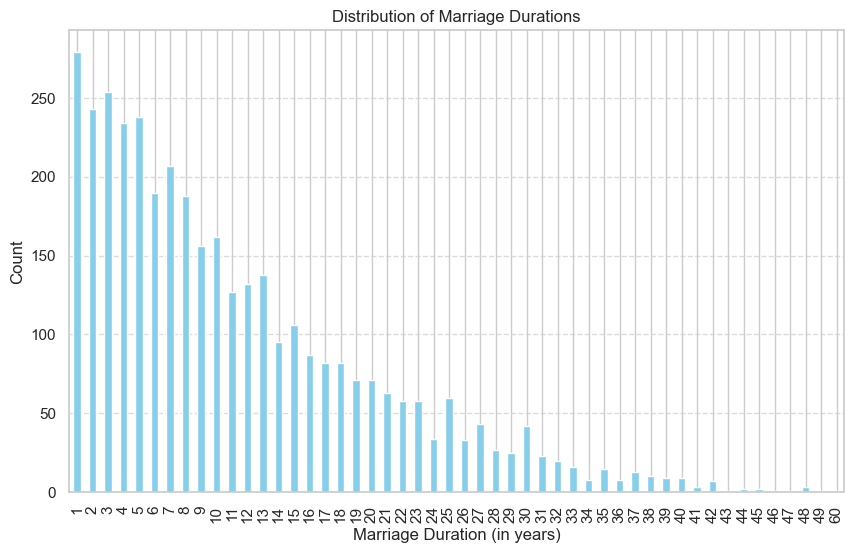

In [251]:
#Create an empty figure
plt.figure(figsize=(10, 6))

# Plot the distribution of Marriage duration
df["Marriage_duration"].value_counts().sort_index().plot(kind="bar", color='skyblue')

plt.title("Distribution of Marriage Durations")
plt.xlabel("Marriage Duration (in years)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Display the plot
plt.show()

Common Marriage Durations: Marriages with durations of 1 to 10 years appear to be more common. This suggests that a substantial number of divorced couples experienced relatively shorter marriages.

Variability in Duration: The data exhibits a wide range of marriage durations, from 1 year to 60 years. This variability underscores the diverse experiences of divorced couples, ranging from relatively brief unions to long-term marriages.

Negative Corelation: We witness a general negative relationship between the duration of marriage and number of divorce occurences.

##### Find what happens to the chances of divorce occurence with rise in income.

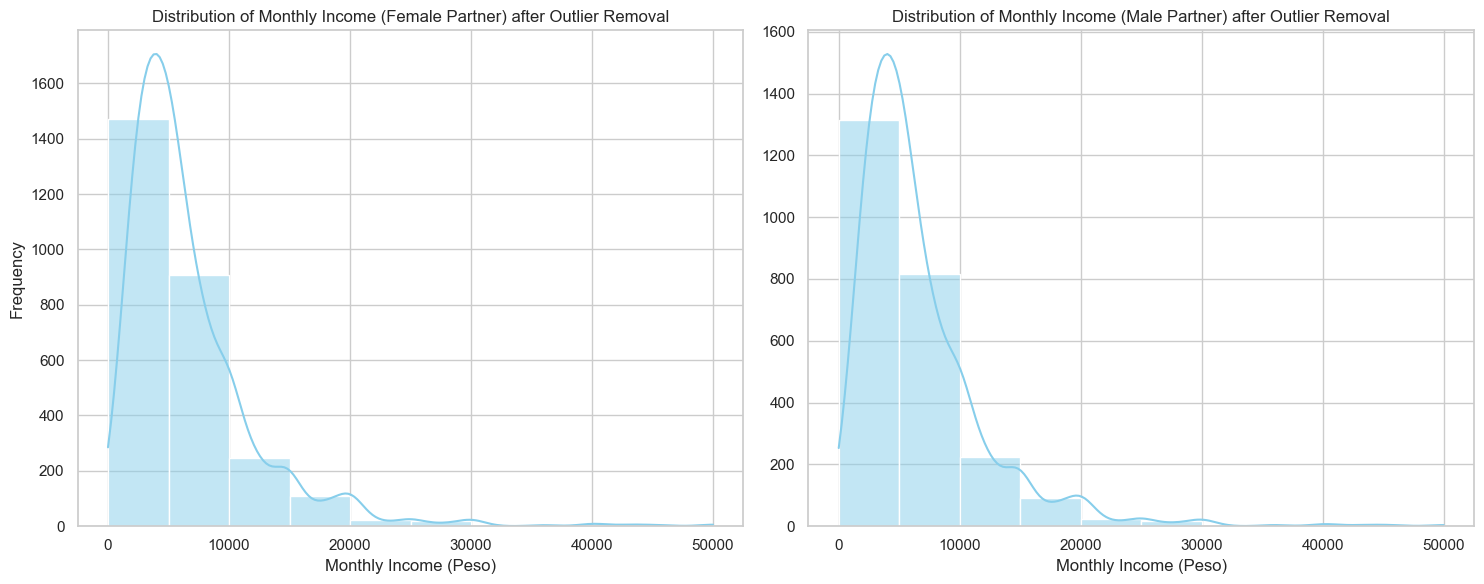

In [252]:
# Create an empty figure
df_copy = df_raw.copy() 

# Outlier Removal
mean_value = df_copy["Monthly_income_partner_woman_peso"].mean()
std_deviation = df_copy["Monthly_income_partner_woman_peso"].std()
lower_bound = mean_value - 3 * std_deviation
upper_bound = mean_value + 3 * std_deviation

df_copy["Monthly_income_partner_woman_peso"] = df_copy["Monthly_income_partner_woman_peso"][
    (df_copy["Monthly_income_partner_woman_peso"] >= lower_bound) &
    (df_copy["Monthly_income_partner_woman_peso"] <= upper_bound)
]

# Create subplots with 1 row and 2 columns
plt.figure(figsize=(15, 6))

# First Graph showing Histogram for Monthly_income_partner_woman_peso after outlier removal
plt.subplot(1, 2, 1)
sns.histplot(df_copy["Monthly_income_partner_woman_peso"].dropna(), bins=10, color='skyblue', kde=True)
plt.title("Distribution of Monthly Income (Female Partner) after Outlier Removal")
plt.xlabel("Monthly Income (Peso)")
plt.ylabel("Frequency")



# Remove outliers
df_copy["Monthly_income_partner_man_peso"] = df_copy["Monthly_income_partner_woman_peso"][
    (df_copy["Monthly_income_partner_man_peso"] >= lower_bound) &
    (df_copy["Monthly_income_partner_man_peso"] <= upper_bound)
]

# Second Graph showing Histogram for Monthly_income_partner_man_peso after outlier removal
plt.subplot(1, 2, 2)
sns.histplot(df_copy["Monthly_income_partner_man_peso"].dropna(), bins=10, color='skyblue', kde=True)
plt.title("Distribution of Monthly Income (Male Partner) after Outlier Removal")
plt.xlabel("Monthly Income (Peso)")
plt.ylabel("")

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

Delving into the intersection of income and divorce, an intriguing trend emerges. As income levels climb, so does the likelihood of divorce—a correlation that initially captures attention. However, navigating further, an unexpected twist unfolds. Beyond a certain income threshold, divorce rates surprisingly take a dip. This paradox hints at the multifaceted nature of marital dynamics, suggesting that the interplay between financial factors and relationship stability is more nuanced than a straightforward cause-and-effect relationship.

__Conclusion :-__ So we can see that the divorce rate is influenced more by all these factors rather than the zodiac signs itself

Thanking the Professor for teaching us wonderfully throughout the semester and  giving us a wonderful opportunity to present to the audience 

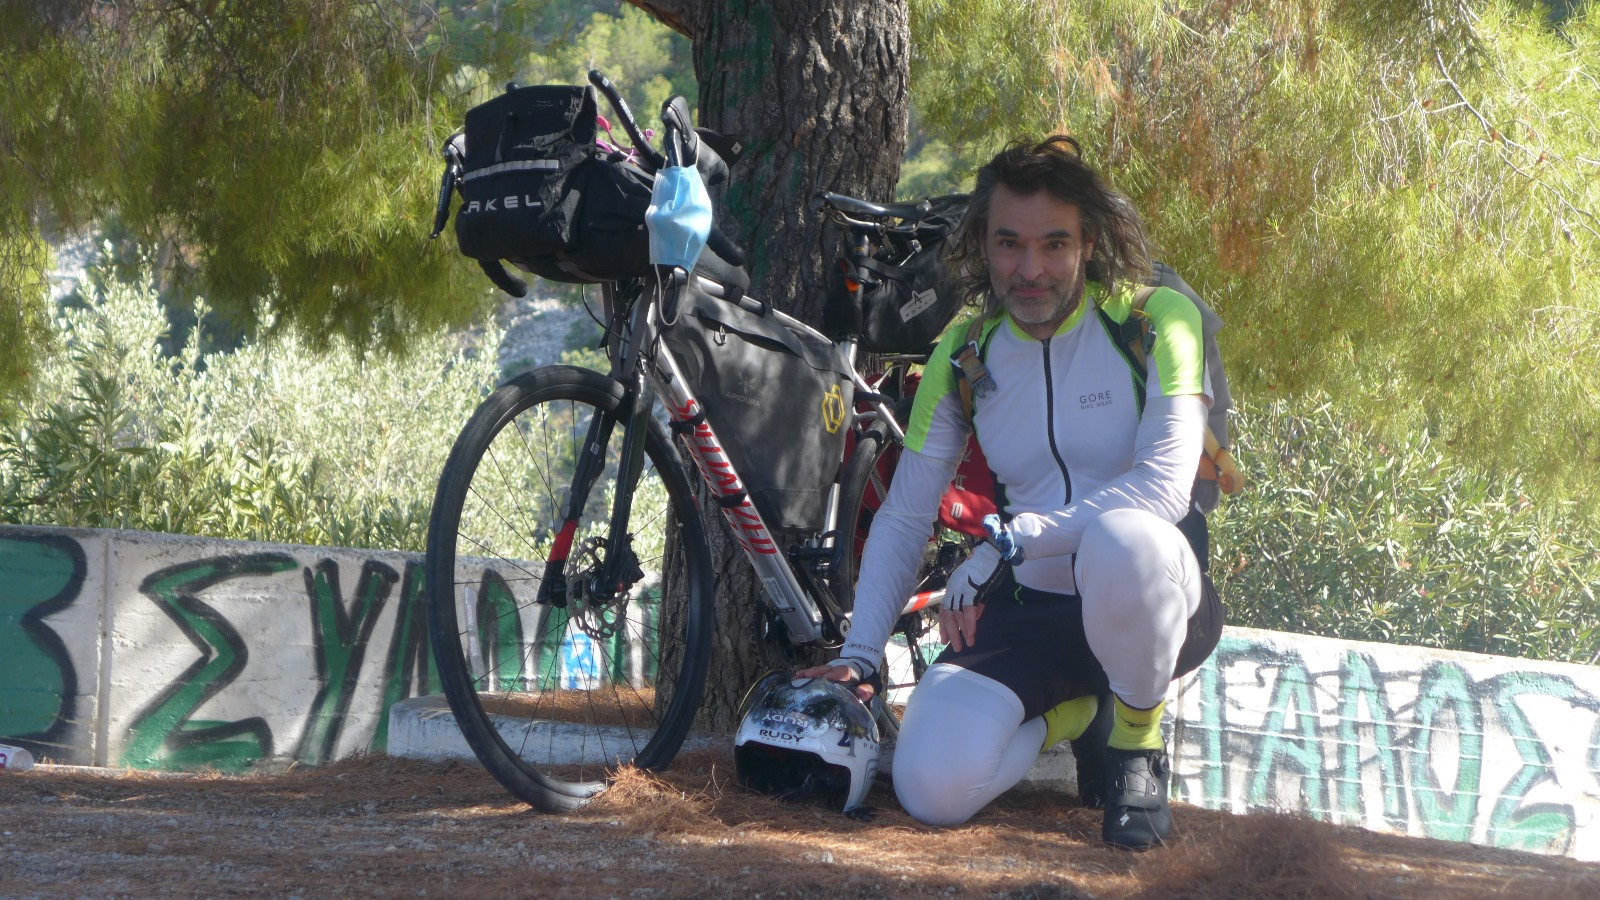